In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import sklearn

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
'''import warnings
warnings.filterwarnings("ignore")'''

'import warnings\nwarnings.filterwarnings("ignore")'

In [3]:
path = '/Users/sarahlenet/Documents/Candidatures Postes/Case Study/'

In [4]:
subscriptions = pd.read_csv(path +'_Subscription_Use_Case.csv')

In [5]:
subscriptions

user_id subscription_signup_date  subscription_monthly_cost  country  \
0          1459            January, 2015                         29    Spain   
1         12474            January, 2015                         49   France   
2         12294            January, 2015                         49  Germany   
3          3878            January, 2015                         49    China   
4          9567            January, 2015                         49       UK   
...         ...                      ...                        ...      ...   
499995   496962            January, 2015                         29    Spain   
499996   480669            January, 2015                         29    Italy   
499997   491164            January, 2015                         29       UK   
499998   493323            January, 2015                         49  Germany   
499999   482977            January, 2015                         49   France   

       source  billing_cycles  is_active  
0         ads               4          0  
1         ads               5          0  
2         ads               2          0  
3         ads               1          0  
4         ads               5          0  
...       ...             ...        ...  
499995    ads               2          0  
499996    seo               1          0  
499997    ads               2          0  
499998    ads               1          0  
499999    ads               5          0  

[500000 rows x 7 columns]

In [6]:
#Check if the is_active is correct
print(subscriptions[(subscriptions['billing_cycles'] !=8) & (subscriptions['is_active'] == 1)])
#Checking for nan values
print(subscriptions.isnull().values.any())

Empty DataFrame
Columns: [user_id, subscription_signup_date, subscription_monthly_cost, country, source, billing_cycles, is_active]
Index: []
False


All possible months of subscription duration:  [1 2 3 4 5 6 7 8]
  Month# #Clients
0      1   500000
1      2   212626
2      3   132788
3      4    97590
4      5    77837
5      6    65206
6      7    56439
7      8    49999


/Users/sarahlenet/miniconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


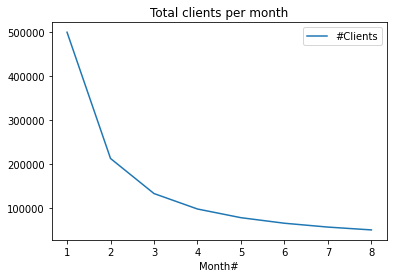

In [7]:
#Visualisation du taux de rétention
billing_cycles = np.sort(subscriptions.billing_cycles.unique())
print('All possible months of subscription duration: ',billing_cycles)
clients_per_month = pd.DataFrame(columns = ['Month#', '#Clients'])
for i in billing_cycles:
    c = len(subscriptions[subscriptions['billing_cycles'] >= i]['user_id'].unique())
    df = pd.DataFrame.from_dict({'Month#': [i], '#Clients': [c]})
    clients_per_month = pd.concat([clients_per_month, df], ignore_index = True)
print(clients_per_month)
clients_per_month.plot('Month#', '#Clients')
plt.title('Total clients per month')
plt.savefig(path + 'Number of clients per month.png', dpi = 150)

Note: les paramètres discriminants peuvent être le pays, le prix et les sources. On pourrait visualiser la rétention pour chacun de ces paramètres. Ici on observe une baisse rapide jusqu'au 2ème mois de plus de 50% puis des désistements moins importants.

Note: Au fur et à mesure du temps on rajoute des données pour affiner le modèle. Une fonction de regression devrait me donner une prédiction sur les prochains mois. Remarque: il n'y a qu'un set de données sur 1 mois de première date d'abonnement (janvier 2015). Il faudrait plus tard affiner les modèles et les variations en fonction des différents mois.

All possible months of subscription duration:  [1 2 3 4 5 6 7 8]
All possible months of subscription costs:  [29 49 99]
   Price Month# #Clients
0     29      1   146362
1     29      2    88921
2     29      3    67103
3     29      4    55066
4     29      5    47279
5     29      6    41774
6     29      7    37638
7     29      8    34527
8     49      1   300397
9     49      2   115252
10    49      3    61956
11    49      4    40266
12    49      5    28978
13    49      6    22251
14    49      7    17846
15    49      8    14673
16    99      1    53241
17    99      2     8453
18    99      3     3729
19    99      4     2258
20    99      5     1580
21    99      6     1181
22    99      7      955
23    99      8      799


/Users/sarahlenet/miniconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


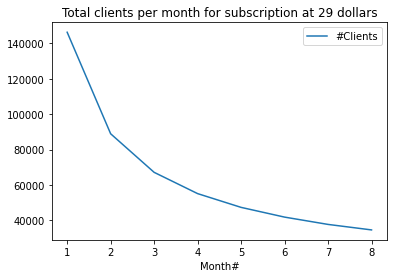

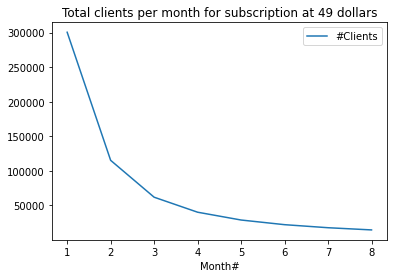

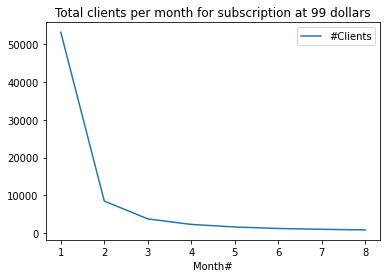

In [8]:
#Visualisation du taux de rétention par prix d'abonnement
billing_cycles = np.sort(subscriptions.billing_cycles.unique())
prices = np.sort(subscriptions.subscription_monthly_cost.unique())
print('All possible months of subscription duration: ',billing_cycles)
print('All possible months of subscription costs: ',prices)
clients_per_month = pd.DataFrame(columns = ['Price','Month#','#Clients'])

for p in prices:
    for i in billing_cycles:     
            c = len(subscriptions[(subscriptions['billing_cycles'] >= i)&(subscriptions['subscription_monthly_cost'] == p)]['user_id'].unique())
            df = pd.DataFrame.from_dict({'Month#': [i], 'Price': [p], '#Clients': [c]})
            clients_per_month = pd.concat([clients_per_month, df], ignore_index = True)
print(clients_per_month)
for p in prices:
    clients_per_month[clients_per_month['Price'] == p].plot('Month#', '#Clients')
    plt.title('Total clients per month for subscription at ' + str(p) + ' dollars' )
    plt.savefig(path + 'Number of clients per month for subscription at ' + str(p) + ' dollars.png', dpi = 150)

In [9]:
clients_per_month['1/#Clients'] = 1/clients_per_month['#Clients']

/Users/sarahlenet/miniconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


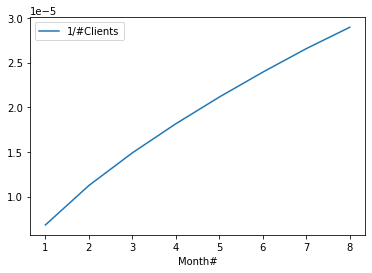

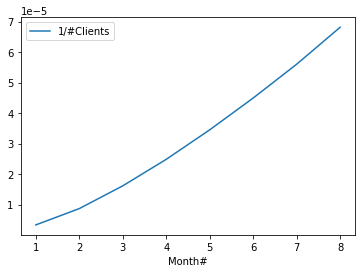

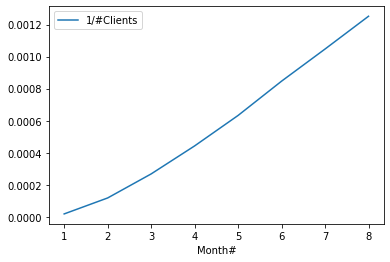

In [10]:
for p in prices:
    clients_per_month[clients_per_month['Price'] == p].plot('Month#', '1/#Clients')

In [11]:
#Start

In [12]:
clients_per_month_with_predictions_clients = clients_per_month.copy()

In [13]:
#Try a linear model for predicting number of clients
from sklearn.linear_model import LinearRegression
X =np.array(billing_cycles).reshape(-1, 1)

def predict_clients_for_month_price(A,p, arr):
    for a in A:
        for p in P:
            regressions = pd.DataFrame(columns = ['Price', 'Regression_Object'])
            y = clients_per_month[clients_per_month['Price'] == p]['1/#Clients'].to_list()
            reg = LinearRegression().fit(X,y)
            df = pd.DataFrame.from_dict({'Price': [p], 'Regression_Object': [reg]})
            regressions = pd.concat([regressions, df])
            rega = reg.predict([[a]])
            dg = pd.DataFrame.from_dict({'Month#' : [a], 'Price' : [p], '#Clients':[int(1/rega)], '1/#Clients': [rega[0]]})
            arr = pd.concat([arr, dg]).sort_values(by = ['Price','Month#'])
            arr = arr.reset_index().drop('index', axis = 1)
    return arr
A = list(range(9,13))
P = prices
clients_per_month_with_predictions_clients = predict_clients_for_month_price(A, P, clients_per_month_with_predictions_clients)
print(clients_per_month_with_predictions_clients)

   Price Month# #Clients 1/#Clients
0     29      1   146362   0.000007
1     29      2    88921   0.000011
2     29      3    67103   0.000015
3     29      4    55066   0.000018
4     29      5    47279   0.000021
5     29      6    41774   0.000024
6     29      7    37638   0.000027
7     29      8    34527   0.000029
8     29      9    30315   0.000033
9     29     10    27700   0.000036
10    29     11    25500   0.000039
11    29     12    23624   0.000042
12    49      1   300397   0.000003
13    49      2   115252   0.000009
14    49      3    61956   0.000016
15    49      4    40266   0.000025
16    49      5    28978   0.000035
17    49      6    22251   0.000045
18    49      7    17846   0.000056
19    49      8    14673   0.000068
20    49      9    13473   0.000074
21    49     10    11964   0.000084
22    49     11    10758   0.000093
23    49     12     9773   0.000102
24    99      1    53241   0.000019
25    99      2     8453   0.000118
26    99      3     3729   0

/Users/sarahlenet/miniconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


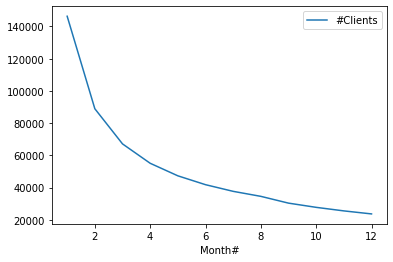

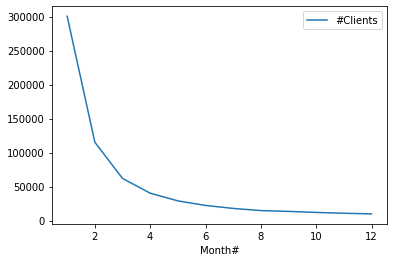

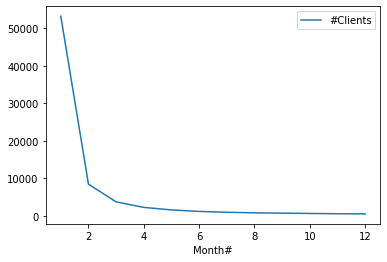

In [14]:
for p in prices:
    clients_per_month_with_predictions_clients[clients_per_month_with_predictions_clients['Price'] == p].plot('Month#', '#Clients')

In [15]:
def fill_retention(arr):
    arr = arr.assign(Retention_overall = 0)
    arr = arr.assign(Retention_per_month = 0)
    clients_per_month_with_ = pd.DataFrame(columns = ['Month#', 'Price', '#Clients', '1/#Clients', 'Retention_overall', 'Retention_per_month'])
    for p in prices:
        a = arr[arr['Price'] == p]['#Clients'].iat[0]
        df = arr[arr['Price'] == p]
        df['Retention_overall'] = df['#Clients'].apply(lambda x: max(x, 100))/a*100
        df['Retention_per_month'] = df['#Clients']/df['#Clients'].shift(1).dropna()*100    
        clients_per_month_with_ = pd.concat([clients_per_month_with_, df])
    return clients_per_month_with_
#v2
'''def fill_retention(arr):
    arr = arr.assign(Retention_overall = 0)
    arr = arr.assign(Retention_per_month = 0)
    clients_per_month_with_ = pd.DataFrame(columns = ['Month#', 'Price', '#Clients', '1/#Clients', 'Retention_overall', 'Retention_per_month'])
    for p in prices:
        a = arr[arr['Price'] == p]['#Clients'].iat[0]
        df = arr[arr['Price'] == p][1:len(arr)+1]
        df1 = df['#Clients'].shift(1).dropna()*100
        df1 = df1.reset_index().drop('index', axis = 1)
        df['Retention_overall'] = df['#Clients']/a*100
        df1 = df1[df1['#Clients'] == 0].replace([0],100000)
        df['Retention_per_month'] = df['#Clients']/df1['#Clients']*100    
        clients_per_month_with_ = pd.concat([clients_per_month_with_, df])
    return clients_per_month_with_'''

"def fill_retention(arr):\n    arr = arr.assign(Retention_overall = 0)\n    arr = arr.assign(Retention_per_month = 0)\n    clients_per_month_with_ = pd.DataFrame(columns = ['Month#', 'Price', '#Clients', '1/#Clients', 'Retention_overall', 'Retention_per_month'])\n    for p in prices:\n        a = arr[arr['Price'] == p]['#Clients'].iat[0]\n        df = arr[arr['Price'] == p][1:len(arr)+1]\n        df1 = df['#Clients'].shift(1).dropna()*100\n        df1 = df1.reset_index().drop('index', axis = 1)\n        df['Retention_overall'] = df['#Clients']/a*100\n        df1 = df1[df1['#Clients'] == 0].replace([0],100000)\n        df['Retention_per_month'] = df['#Clients']/df1['#Clients']*100    \n        clients_per_month_with_ = pd.concat([clients_per_month_with_, df])\n    return clients_per_month_with_"

In [16]:
clients_per_month_with_predictions_clients = fill_retention(clients_per_month_with_predictions_clients)

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/996713024.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Retention_overall'] = df['#Clients'].apply(lambda x: max(x, 100))/a*100
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/996713024.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Retention_per_month'] = df['#Clients']/df['#Clients'].shift(1).dropna()*100
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/996713024.py:8: SettingWithCopyWarnin

In [17]:
print(clients_per_month_with_predictions_clients)

   Month# Price #Clients 1/#Clients Retention_overall Retention_per_month
0       1    29   146362   0.000007             100.0                 NaN
1       2    29    88921   0.000011         60.754157           60.754157
2       3    29    67103   0.000015         45.847283           75.463614
3       4    29    55066   0.000018         37.623154           82.061905
4       5    29    47279   0.000021         32.302784           85.858788
5       6    29    41774   0.000024         28.541561           88.356353
6       7    29    37638   0.000027         25.715691           90.099105
7       8    29    34527   0.000029          23.59014           91.734417
8       9    29    30315   0.000033         20.712343           87.800852
9      10    29    27700   0.000036         18.925677           91.373907
10     11    29    25500   0.000039         17.422555           92.057762
11     12    29    23624   0.000042         16.140802           92.643137
12      1    49   300397   0.000003   

In [18]:
import plotly.figure_factory as ff
import kaleido

df = clients_per_month_with_predictions_clients.drop('Retention_per_month', axis = 1)
df = df.drop('1/#Clients', axis = 1)

fig =  ff.create_table(df)
fig.update_layout(
    autosize=True
)
fig.write_image(path + "Predictions to month 12.png")
fig.show()

In [19]:
#Try a curvefitting model for fun

In [20]:
#Start

In [21]:
clients_per_month_with_retention = clients_per_month.copy()
clients_per_month_with_retention = fill_retention(clients_per_month_with_retention)

In [22]:
print(clients_per_month_with_retention)

   Month# Price #Clients 1/#Clients Retention_overall Retention_per_month
0       1    29   146362   0.000007             100.0                 NaN
1       2    29    88921   0.000011         60.754157           60.754157
2       3    29    67103   0.000015         45.847283           75.463614
3       4    29    55066   0.000018         37.623154           82.061905
4       5    29    47279   0.000021         32.302784           85.858788
5       6    29    41774   0.000024         28.541561           88.356353
6       7    29    37638   0.000027         25.715691           90.099105
7       8    29    34527   0.000029          23.59014           91.734417
8       1    49   300397   0.000003             100.0                 NaN
9       2    49   115252   0.000009         38.366562           38.366562
10      3    49    61956   0.000016         20.624707           53.756985
11      4    49    40266   0.000025         13.404262           64.991284
12      5    49    28978   0.000035   

/Users/sarahlenet/miniconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



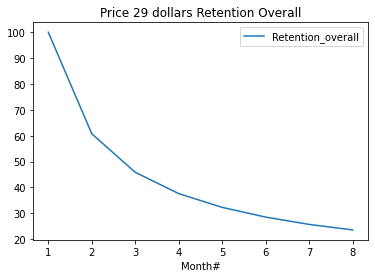

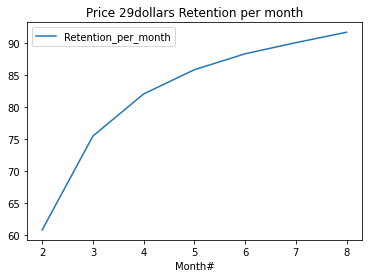

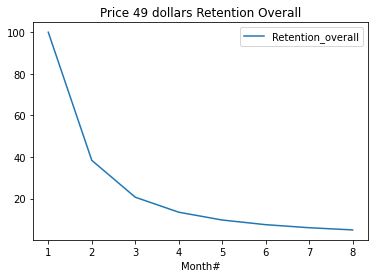

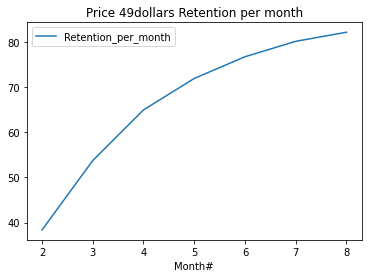

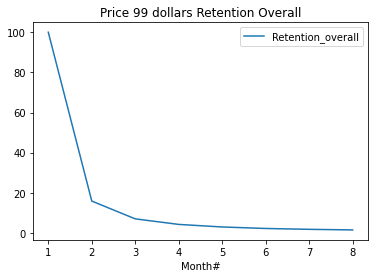

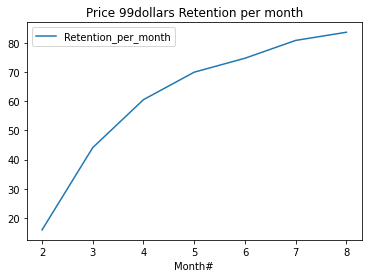

In [23]:
for p in prices:
    clients_per_month_with_retention[clients_per_month_with_retention['Price'] == p].plot('Month#', 'Retention_overall')
    plt.title('Price ' + str(p) + ' dollars Retention Overall')
    plt.show()
    clients_per_month_with_retention[clients_per_month_with_retention['Price'] == p].plot('Month#', 'Retention_per_month')
    plt.title('Price ' + str(p) + 'dollars Retention per month')
    plt.show()

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/1420013225.py:3: RuntimeWarning:

invalid value encountered in log



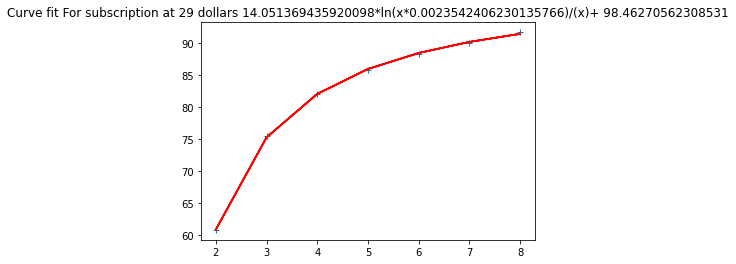

In [24]:
from scipy.optimize import curve_fit
def func29(x, a, b, c):
    return a * np.log(x*b)/(x) + c
for p in prices[0:1]:
    Xx = clients_per_month_with_retention[clients_per_month_with_retention['Price'] == p].dropna()
    X = Xx['Month#'].to_list()
    y = Xx['Retention_per_month'].to_list()
    pt29, pcov29 = curve_fit(func29, X, y, maxfev =1000000000)
    plt.figure()
    plt.plot(X, y, '+', label="valeurs expérimentales")
    for x in X:
        A = list(map(lambda x: pt29[0]*np.log(x*pt29[1])/(x)+ pt29[2], X))
        plt.plot(X, A, 'r-', label="Modélisation")
    plt.title('Curve fit For subscription at 29 dollars '+ str(pt29[0]) + '*ln(x*' + str(pt29[1]) + ')' + '/(x)+ ' + str(pt29[2]) )

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/282350518.py:3: RuntimeWarning:

invalid value encountered in log



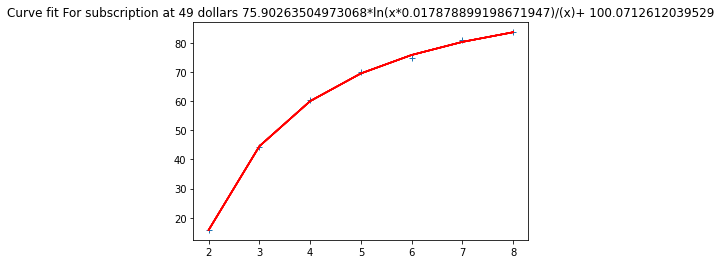

In [25]:
from scipy.optimize import curve_fit
def func49(x, a, b, c):
    return a * np.log(x*b)/(x+1) + c
for p in prices[2:3]:
    Xx = clients_per_month_with_retention[clients_per_month_with_retention['Price'] == p].dropna()
    X = Xx['Month#'].to_list()
    y = Xx['Retention_per_month'].to_list()
    pt49, pcov49 = curve_fit(func49, X, y, maxfev =1000000000)
    plt.figure()
    plt.plot(X, y, '+', label="valeurs expérimentales")
    for x in X:
        A = list(map(lambda x: pt49[0]*np.log(x*pt49[1])/(x+1)+ pt49[2], X))
        plt.plot(X, A, 'r-', label="Modélisation")
        plt.title('Curve fit For subscription at 49 dollars '+ str(pt49[0]) + '*ln(x*' + str(pt49[1]) + ')' + '/(x)+ ' + str(pt49[2]) )

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/2959264505.py:3: RuntimeWarning:

invalid value encountered in log



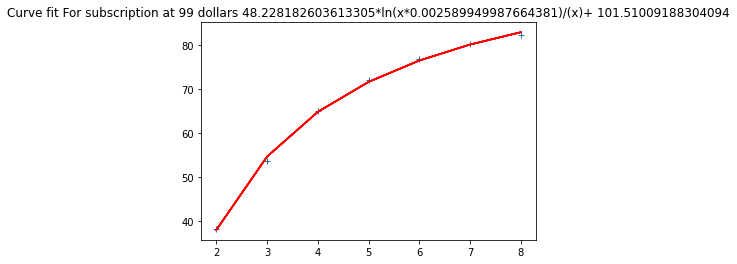

In [26]:
from scipy.optimize import curve_fit
def func99(x, a, b, c):
    return a * np.log(x*b)/(x+2) + c
for p in prices[1:2]:
    Xx = clients_per_month_with_retention[clients_per_month_with_retention['Price'] == p].dropna()
    X = Xx['Month#'].to_list()
    y = Xx['Retention_per_month'].to_list()
    pt99, pcov99 = curve_fit(func99, X, y, maxfev =1000000000)
    plt.figure()
    plt.plot(X, y, '+', label="valeurs expérimentales")
    for x in X:
        A = list(map(lambda x: pt99[0]*np.log(x*pt99[1])/(x+2)+ pt99[2], X))
        plt.plot(X, A, 'r-', label="Modélisation")
        plt.title('Curve fit For subscription at 99 dollars '+ str(pt99[0]) + '*ln(x*' + str(pt99[1]) + ')' + '/(x)+ ' + str(pt99[2]) )

# 

In [27]:
#Visualize retention rate
billing_cycles = np.sort(subscriptions.billing_cycles.unique())
countries = np.sort(subscriptions.country.unique())
prices = np.sort(subscriptions.subscription_monthly_cost.unique())
print('All possible values of months of subscription duration: ',billing_cycles)
print('All possible values of months of subscription costs: ',prices)
print('All possible value of months of subscription countries: ',countries)
clients_per_month = pd.DataFrame(columns = ['Month#', 'Price', 'Country','#Clients'])
print(len(subscriptions[(subscriptions['country'] == 'China')&(subscriptions['billing_cycles'] > 1)&(subscriptions['subscription_monthly_cost'] == 29 )].sort_values(by = ['subscription_monthly_cost','billing_cycles'])))

for co in countries:
    for p in prices:
        for i in billing_cycles:  
                c = len(subscriptions[(subscriptions['billing_cycles'] >= i)&(subscriptions['subscription_monthly_cost'] == p)&(subscriptions['country']==co)]['user_id'].unique())
                df = pd.DataFrame.from_dict({'Month#': [i], 'Price': [p], 'Country' : [co], '#Clients': [c]})
                clients_per_month = pd.concat([clients_per_month, df])
clients_per_month = clients_per_month.reset_index().drop('index', axis = 1)
print(clients_per_month)

All possible values of months of subscription duration:  [1 2 3 4 5 6 7 8]
All possible values of months of subscription costs:  [29 49 99]
All possible value of months of subscription countries:  ['China' 'France' 'Germany' 'India' 'Italy' 'Spain' 'UK' 'US']
13277
    Month# Price Country #Clients
0        1    29   China    16741
1        2    29   China    13277
2        3    29   China    12345
3        4    29   China    11774
4        5    29   China    11312
..     ...   ...     ...      ...
187      4    99      US      594
188      5    99      US      408
189      6    99      US      305
190      7    99      US      254
191      8    99      US      207

[192 rows x 4 columns]


In [28]:
clients_per_month = clients_per_month.assign(Retention_overall = 0)
clients_per_month = clients_per_month.assign(Retention_per_month = 0)
clients_per_month_with_retention = pd.DataFrame(columns = ['Month#', 'Price', 'Country', '#Clients', 'Retention_overall', 'Retention_per_month'])
for p in prices:
    for co in countries:
        a = clients_per_month[(clients_per_month['Price'] == p)&(clients_per_month['Country'] == co)]['#Clients'].iat[0]
        df = clients_per_month[(clients_per_month['Price'] == p)&(clients_per_month['Country'] == co)]
        df['Retention_overall'] = df['#Clients']/a*100
        df['Retention_per_month'] = df['#Clients']/df['#Clients'].shift(1).dropna()*100    
        clients_per_month_with_retention = pd.concat([clients_per_month_with_retention, df])
    

In [29]:
clients_per_month_with_retention

Month# Price Country #Clients Retention_overall Retention_per_month
0        1    29   China    16741             100.0                 NaN
1        2    29   China    13277         79.308285           79.308285
2        3    29   China    12345         73.741115           92.980342
3        4    29   China    11774         70.330327           95.374646
4        5    29   China    11312         67.570635             96.0761
..     ...   ...     ...      ...               ...                 ...
187      4    99      US      594          5.434584           61.490683
188      5    99      US      408          3.732845           68.686869
189      6    99      US      305          2.790485           74.754902
190      7    99      US      254          2.323879           83.278689
191      8    99      US      207           1.89387           81.496063

[192 rows x 6 columns]

In [83]:
def draw_colors(n):
    from random import randint
    color = []
    for i in range(n):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    return color
            
def plot_retention_price(retention_or_clients, price, country, title, n, df):
    legend = []
    color = draw_colors(n)
    j = 0
    m = 0
    for p in price:
        fig, ax = plt.subplots()
        for co in country:
            x = df[(df['Price'] == p)&(df['Country'] == co)]['Month#'].reset_index().drop('index', axis = 1)
            y = df[(df['Price'] == p)&(df['Country'] == co)][retention_or_clients].reset_index().drop('index', axis = 1)
            legend += [co + ' ' + str(p)]
            ax.plot(x,y, label= [co + ' ' + str(p)], color = color[j])  
            leg = ax.legend(legend[m:j+1], bbox_to_anchor=(1, 0.5))
            j += 1
        for t in range(m,j-1):
            leg.get_lines()[t-m].set_color(color[t])
        m = j
        plt.title('Global for ' + str(p) + ' dollars - ' + title)
        plt.savefig(path + 'Global for ' + str(p) + ' dollars - ' + title + '.png')
        plt.show()
        
def plot_retention_country(retention_or_clients, price, country, title, n, df):
    legend = []
    color = draw_colors(n)
    j = 0
    m = 0
    for co in country:
        fig, ax = plt.subplots()
        for p in price:
            x = df[(df['Price'] == p)&(df['Country'] == co)]['Month#'].reset_index().drop('index', axis = 1)
            y = df[(df['Price'] == p)&(df['Country'] == co)][retention_or_clients].reset_index().drop('index', axis = 1)
            legend += [co + ' ' + str(p)]
            ax.plot(x,y, label= [co + ' ' + str(p)], color = color[j])
            leg = ax.legend(legend[m:j+1], bbox_to_anchor=(1, 0.5))
            j += 1
        for t in range(m,j-1):
            leg.get_lines()[t-m].set_color(color[t])
        m = j
        plt.title(co + ' - ' + title)
        plt.savefig(path + co + ' - ' + title + '.png')
        plt.show()

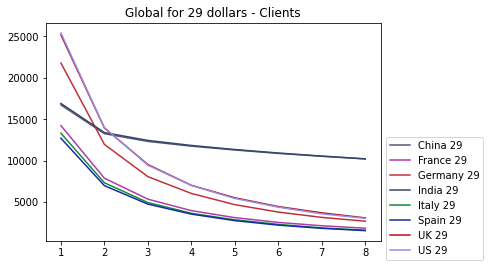

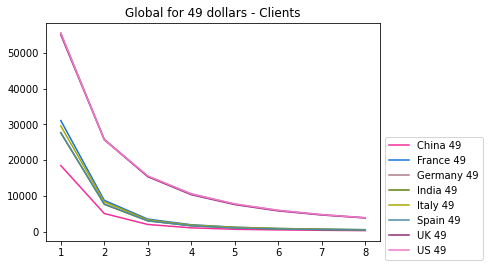

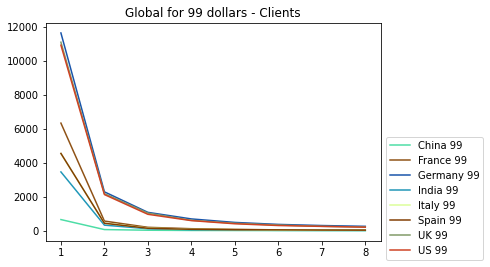

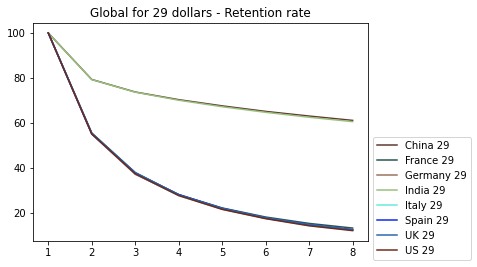

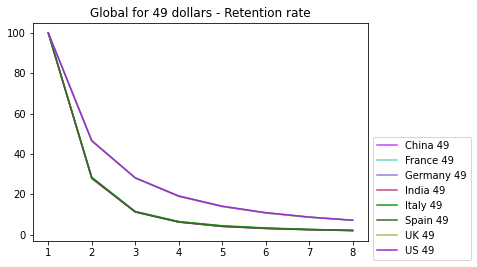

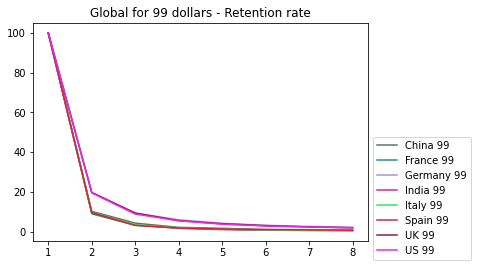

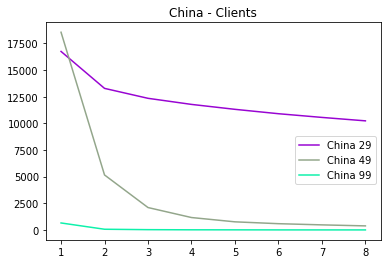

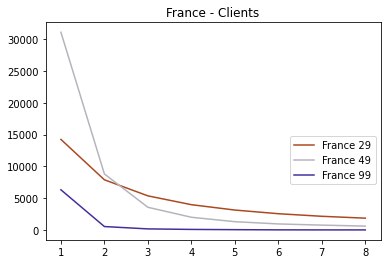

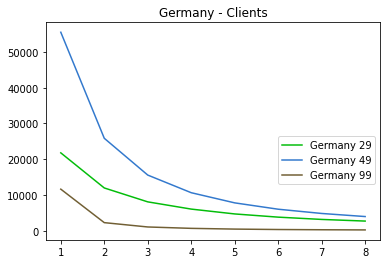

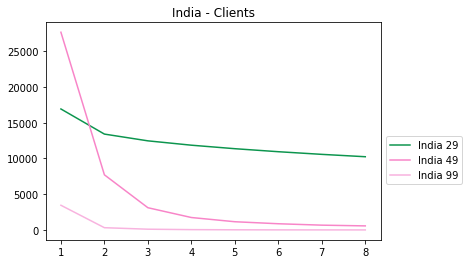

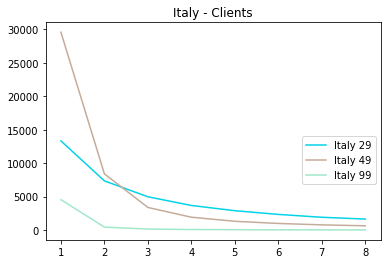

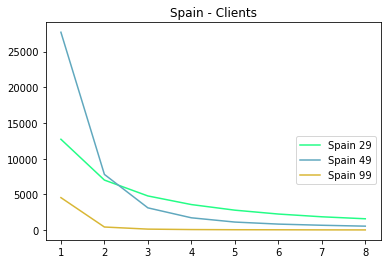

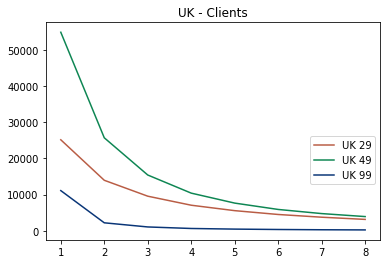

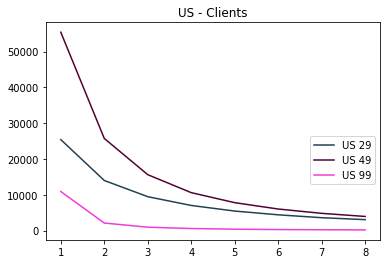

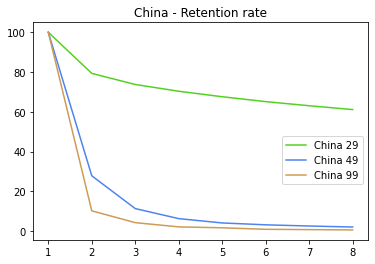

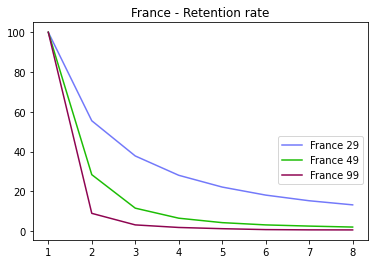

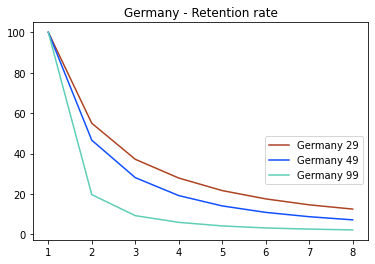

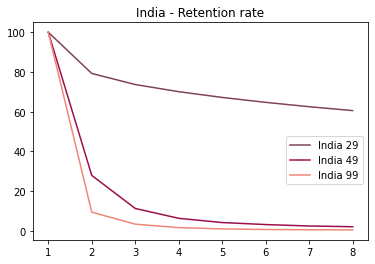

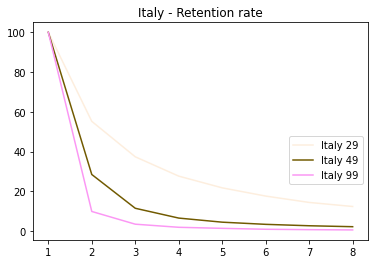

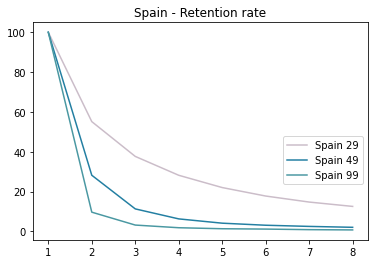

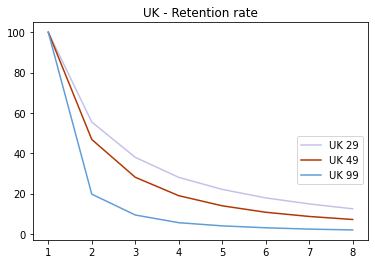

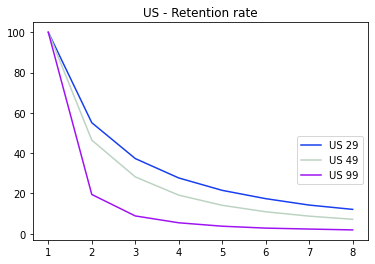

In [84]:
n_plots = len(countries)*len(prices)
plot_retention_price('#Clients', prices, countries, 'Clients', n_plots, clients_per_month)
plot_retention_price('Retention_overall', prices, countries, 'Retention rate', n_plots, clients_per_month_with_retention)
plot_retention_country('#Clients', prices, countries, 'Clients', n_plots, clients_per_month)    
plot_retention_country('Retention_overall', prices, countries, 'Retention rate', n_plots, clients_per_month_with_retention)

In [64]:
clients_per_month_with_retention['1/#Clients'] = 1/clients_per_month_with_retention['#Clients']

In [170]:
clients_per_month_with_retention

Month# Price Country #Clients Retention_overall Retention_per_month  \
0        1    29   China    16741             100.0                 NaN   
1        2    29   China    13277         79.308285           79.308285   
2        3    29   China    12345         73.741115           92.980342   
3        4    29   China    11774         70.330327           95.374646   
4        5    29   China    11312         67.570635             96.0761   
..     ...   ...     ...      ...               ...                 ...   
187      4    99      US      594          5.434584           61.490683   
188      5    99      US      408          3.732845           68.686869   
189      6    99      US      305          2.790485           74.754902   
190      7    99      US      254          2.323879           83.278689   
191      8    99      US      207           1.89387           81.496063   

    1/#Clients  
0      0.00006  
1     0.000075  
2     0.000081  
3     0.000085  
4     0.000088  
..         ...  
187   0.001684  
188   0.002451  
189   0.003279  
190   0.003937  
191   0.004831  

[192 rows x 7 columns]

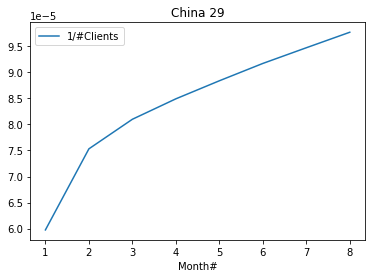

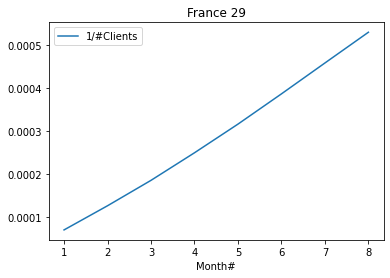

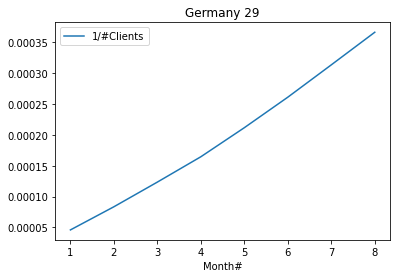

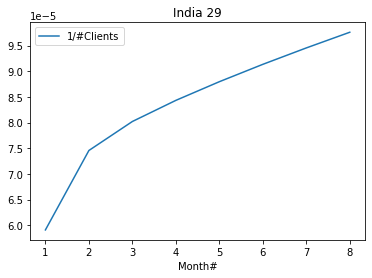

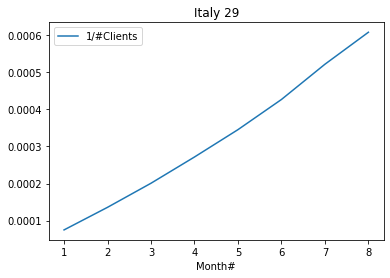

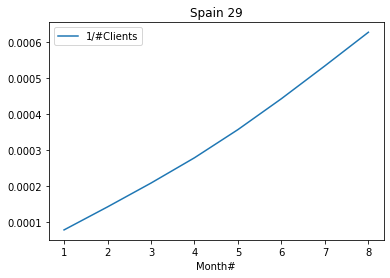

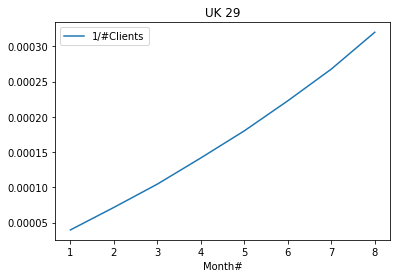

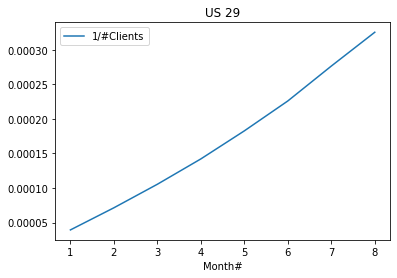

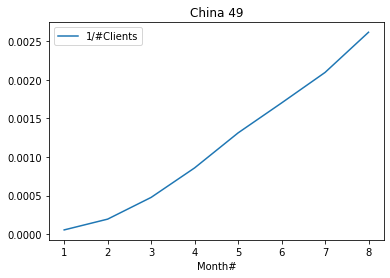

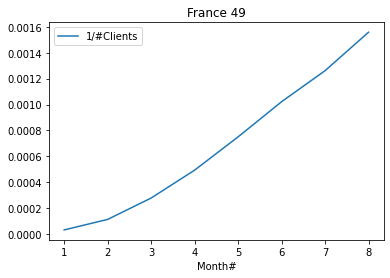

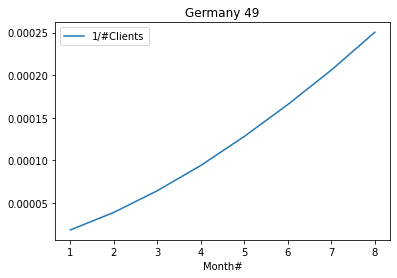

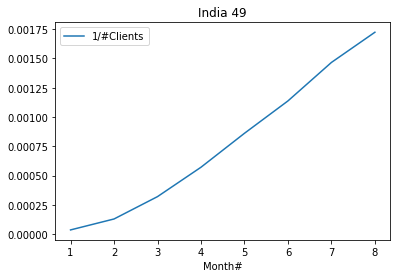

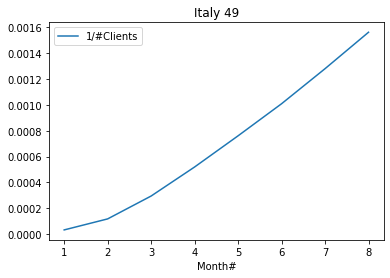

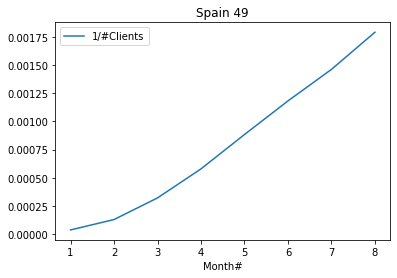

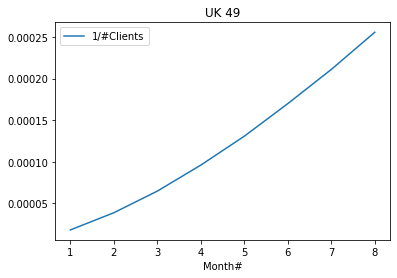

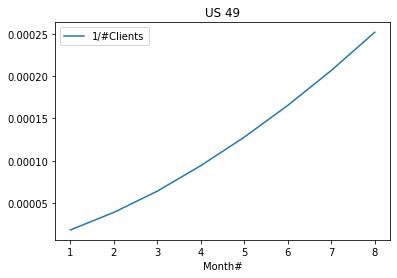

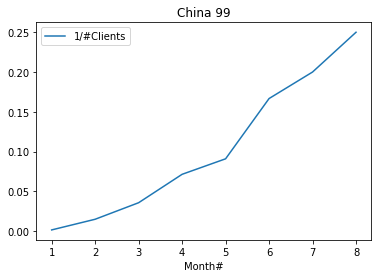

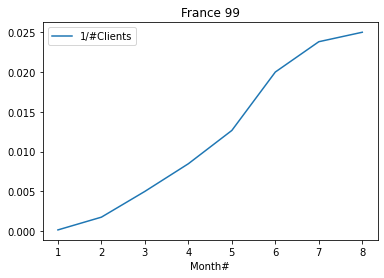

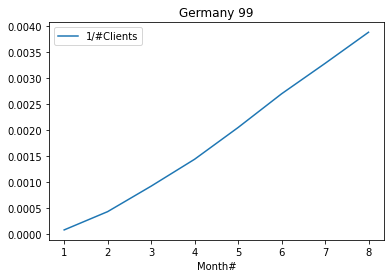

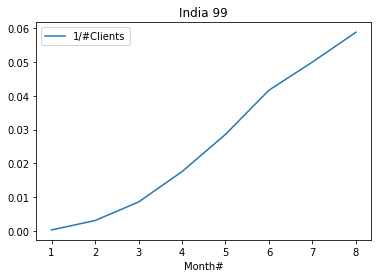

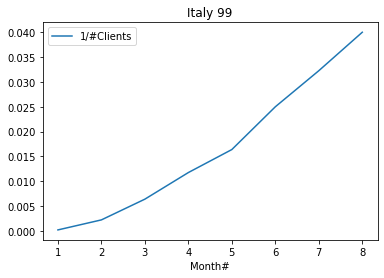

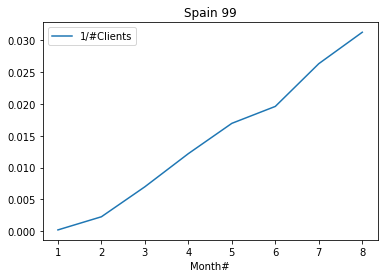

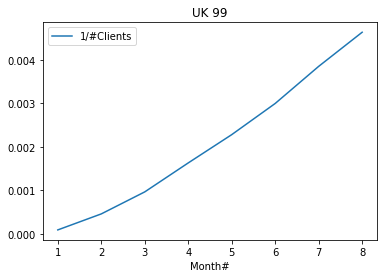

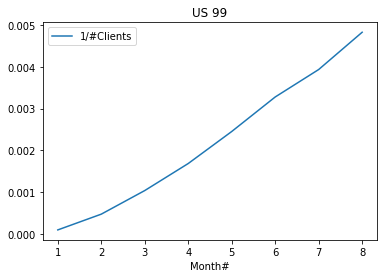

In [171]:
for p in prices:
    for co in countries:
        clients_per_month_with_retention[(clients_per_month_with_retention['Price'] == p)&(clients_per_month_with_retention['Country'] == co)].plot('Month#', '1/#Clients')
        plt.title(co + ' ' + str(p))

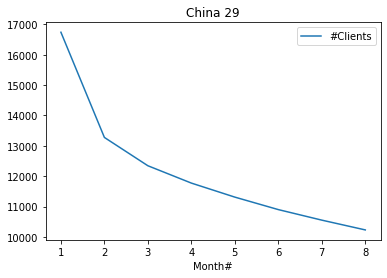

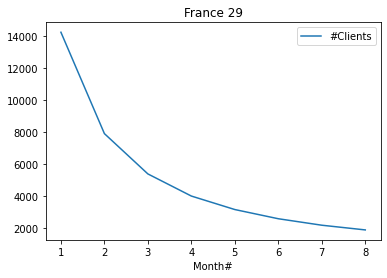

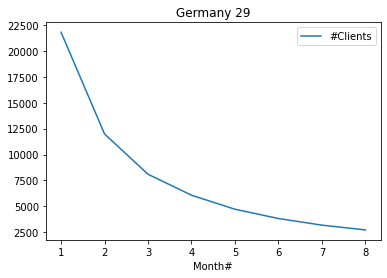

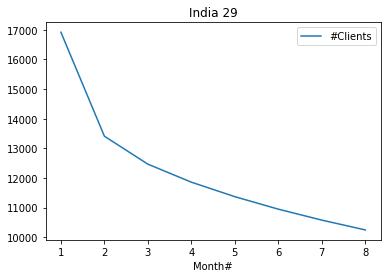

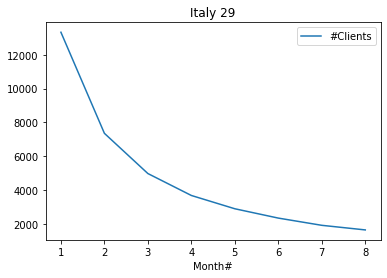

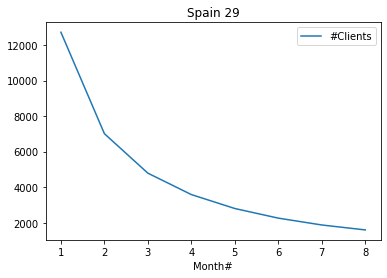

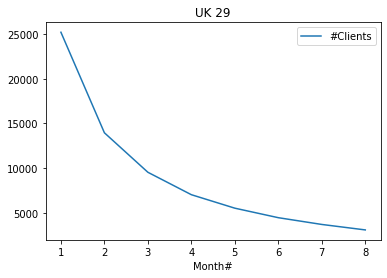

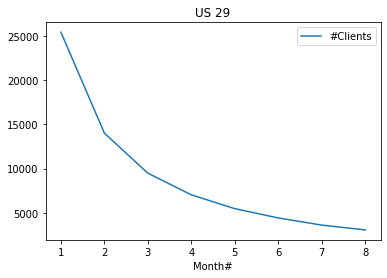

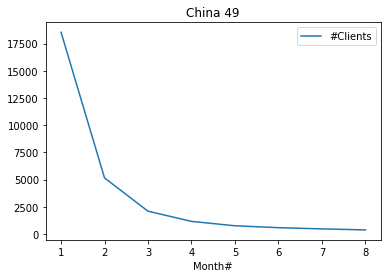

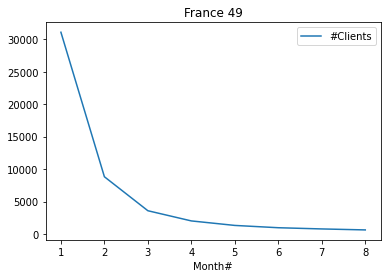

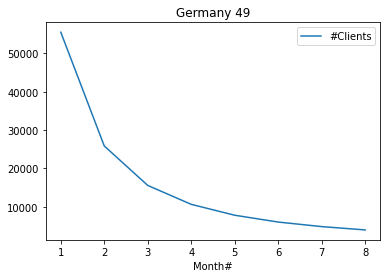

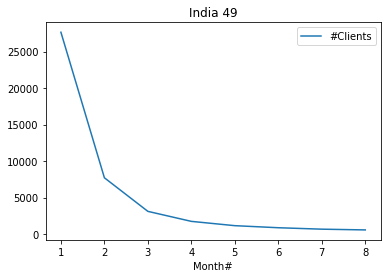

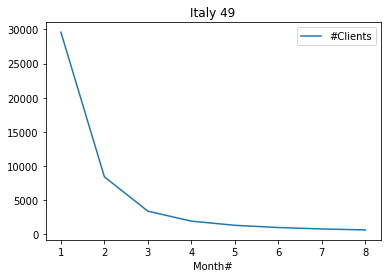

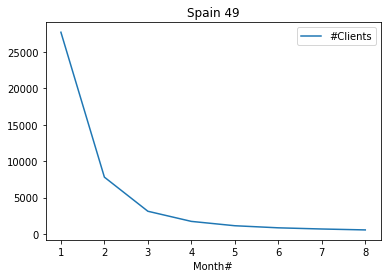

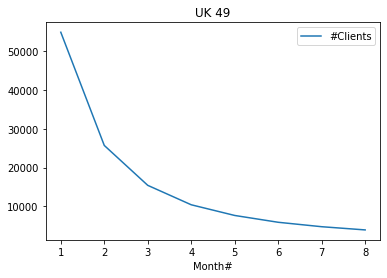

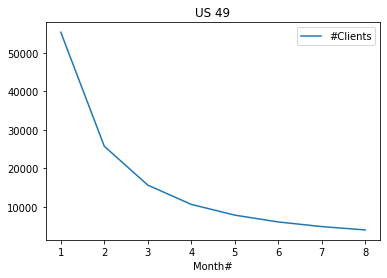

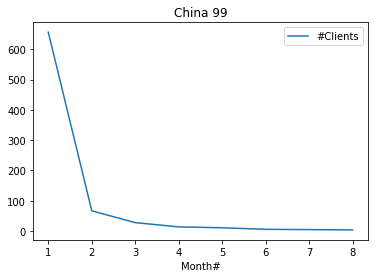

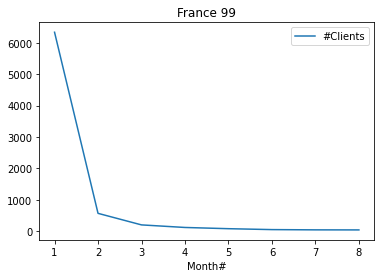

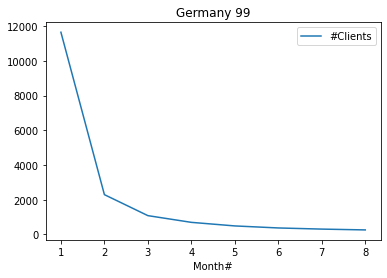

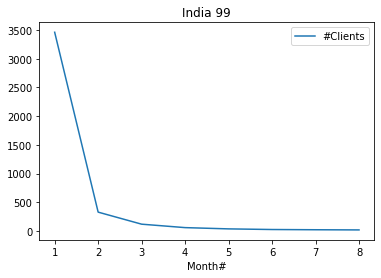

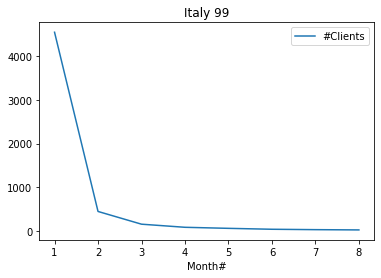

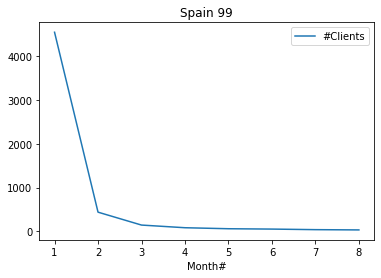

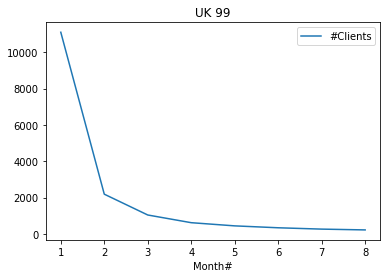

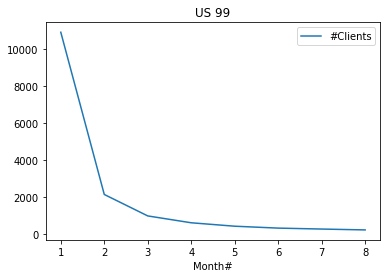

In [179]:
for p in prices:
    for co in countries:
        clients_per_month_with_retention[(clients_per_month_with_retention['Price'] == p)&(clients_per_month_with_retention['Country'] == co)].plot('Month#', '#Clients')
        plt.title(co + ' ' + str(p))

29 dollars : China and India have a different pattern and seem to stabilize at 60% and loses 20% in the first 2 months. The rest seems to go down to zero and lose more than 50% in the fist 2 months. 
49 dollars is favored by India and UK compared to other countries. All seem to go down to zero and lose more than 50% in the first 2 months.
99 is favored by Germany, US and UK compared to other countries and China has much fewer susbcriptions. And goes down to 20% in the first 2 months. What behavioral patterns might explain this ? 

Price is one key aspect, retention is better for cheaper subscriptions.

Quality of the curves and recommendations (polls: enquetes téléphoniques sur les raisons de drop, prix, voir le contenu des users contenu, et on y réfléchira quand on fera le ppt)

What type of subscription is favored by country: customized solutions per country (for example subscription at 49 is favored by Germany, China has a much better retention rate for subscriptions at 29 dollars, but start approximately at the same number of clients for 49 dollars)

               #Clients
Country Price          
China   29        16741
        49        18541
        99          656
France  29        14249
        49        31074
        99         6339
Germany 29        21794
        49        55500
        99        11650
India   29        16920
        49        27644
        99         3463
Italy   29        13336
        49        29578
        99         4545
Spain   29        12725
        49        27709
        99         4553
UK      29        25181
        49        54966
        99        11105
US      29        25416
        49        55385
        99        10930
       #Clients
Price          
29        16741
49        18541
99          656
       #Clients
Price          
29        14249
49        31074
99         6339
       #Clients
Price          
29        21794
49        55500
99        11650
       #Clients
Price          
29        16920
49        27644
99         3463
       #Clients
Price          
29        13336
49      

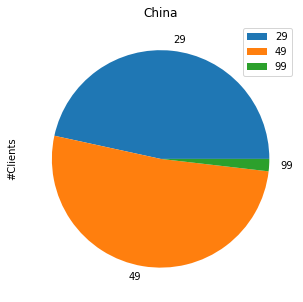

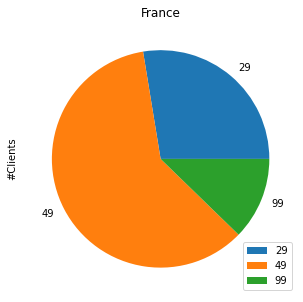

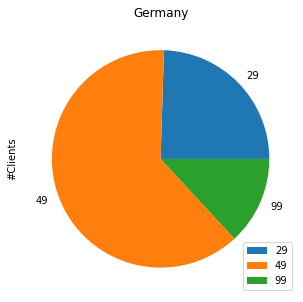

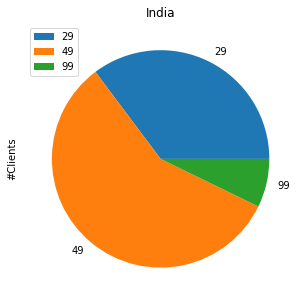

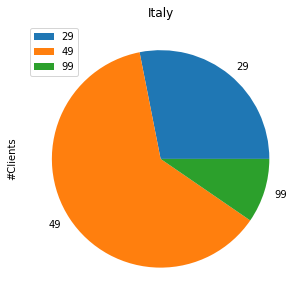

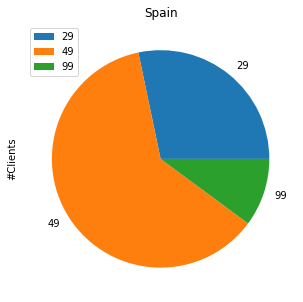

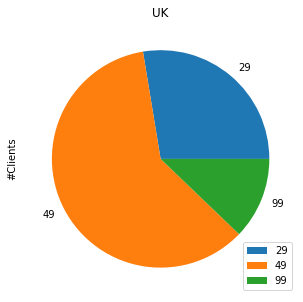

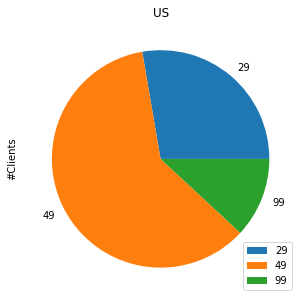

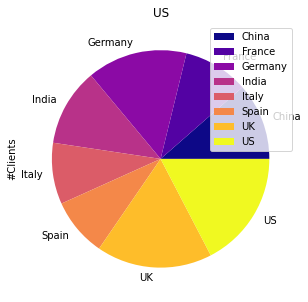

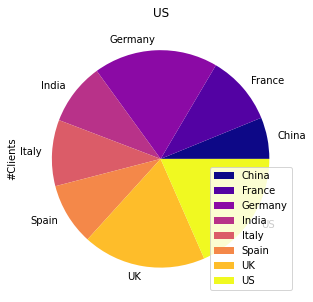

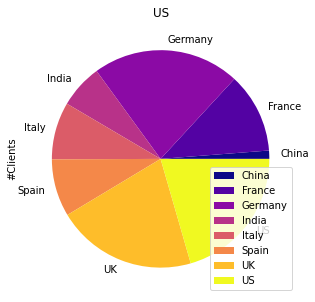

In [86]:
#Market analysis
df1 = clients_per_month_with_retention[['Price', 'Country', '#Clients']][clients_per_month_with_retention['Month#'] == 1]
df1 = df1.groupby(['Country','Price']).sum()
print(df1)
for co in countries:
    df = df1.loc[co]
    print(df)
    plot = df.plot.pie(y='#Clients', figsize=(5, 5), title = co)
    plt.savefig(path + 'Repartition for country ' + co)

df1 = clients_per_month_with_retention[['Price', 'Country', '#Clients']][clients_per_month_with_retention['Month#'] == 1]
df1 = df1.groupby(['Price', 'Country']).sum()
for p in prices:
    df = df1.loc[p]
    print(df)
    plot = df.plot.pie(y='#Clients', figsize=(5, 5), title = co, cmap = 'plasma')
    plt.savefig(path + 'Repartition for price ' + str(p))


Note: on peut le faire pour les autres mois, par exemple au dernier mois ou au deuxième mois qui seraient les plus significatifs.

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/2652847668.py:3: RuntimeWarning:

invalid value encountered in log



[84.73009033  0.46905518 82.30693628]
[[ 1.55883458e+02  4.56892570e-01 -4.06818051e+01]
 [ 4.56892570e-01  1.51193338e-03 -1.26897612e-01]
 [-4.06818051e+01 -1.26897612e-01  1.10417786e+01]]
79.60033145631117
91.9542314781288
95.63623967628413
96.75177364997157
96.91898775187525
96.6974376889229
96.31289088329406


/Users/sarahlenet/miniconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning:

Covariance of the parameters could not be estimated



[nan nan nan]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
nan
nan
nan
nan
nan
nan
nan
[nan nan nan]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
nan
nan
nan
nan
nan
nan
nan
[83.64733756  0.46733826 82.39862635]
[[ 1.80157869e+02  5.36608844e-01 -4.70168366e+01]
 [ 5.36608844e-01  1.80171442e-03 -1.48976173e-01]
 [-4.70168366e+01 -1.48976173e-01  1.27612204e+01]]
79.57323727885768
91.82039255729777
95.48091086087618
96.59752675036046
96.77282881742181
96.56141331460327
96.1872581278738
[nan nan nan]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
nan
nan
nan
nan
nan
nan
nan
[nan nan nan]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
nan
nan
nan
nan
nan
nan
nan
[1.45953292e-001 7.56653501e-228 9.35692490e+001]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
55.45555224278271
68.17984415370152
74.53769240370676
78.35051743178343
80.89140776641896
82.70574205798194
84.06611659504799
[nan nan nan]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
nan
nan
nan
nan
nan
nan
nan
[2.13549030e-001 5.91

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/2652847668.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



[nan nan nan]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
nan
nan
nan
nan
nan
nan
nan
[nan nan nan]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
nan
nan
nan
nan
nan
nan
nan
[nan nan nan]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
nan
nan
nan
nan
nan
nan
nan


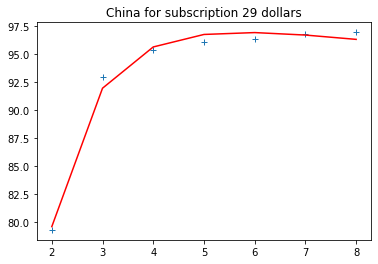

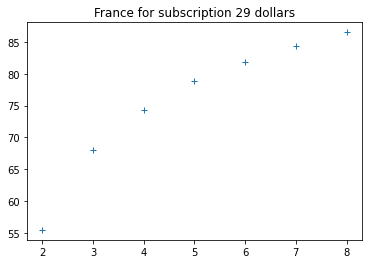

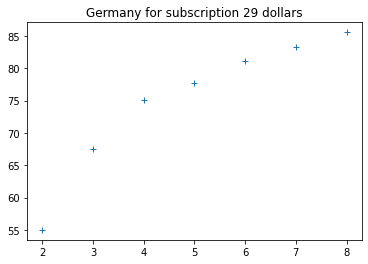

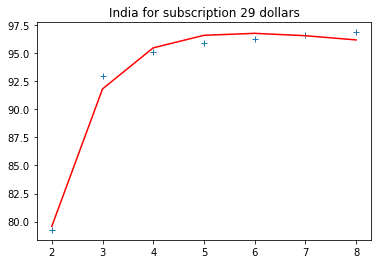

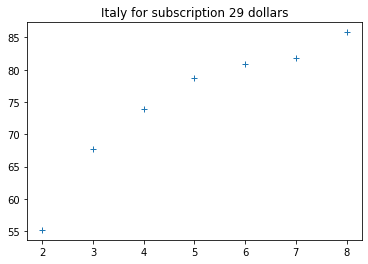

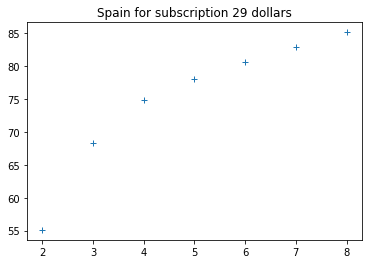

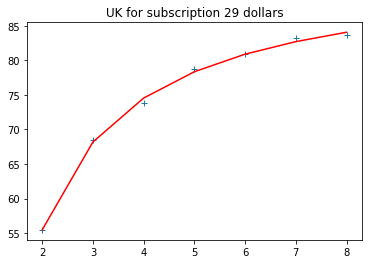

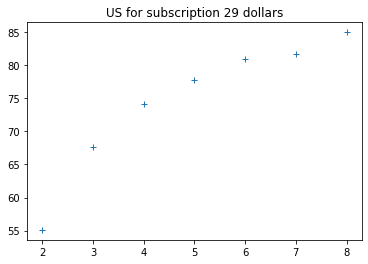

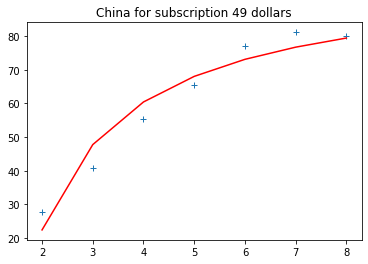

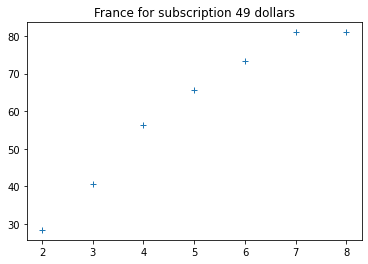

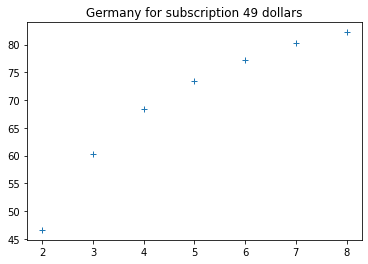

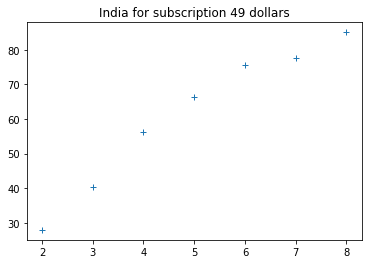

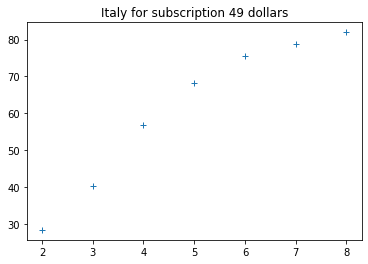

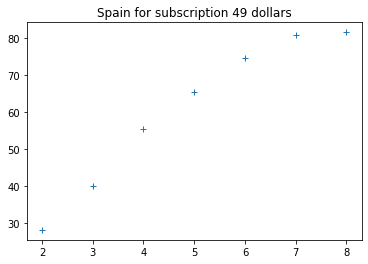

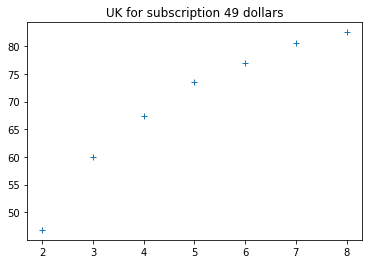

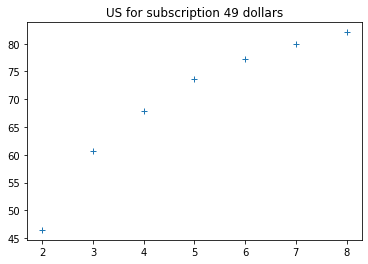

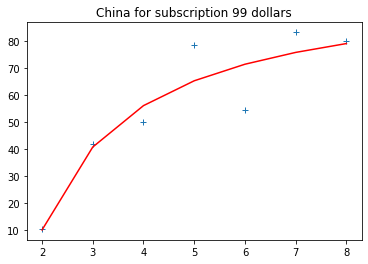

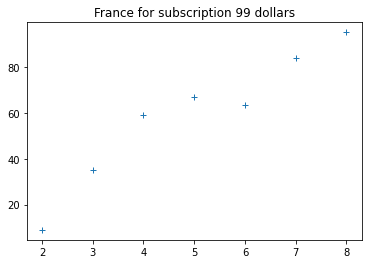

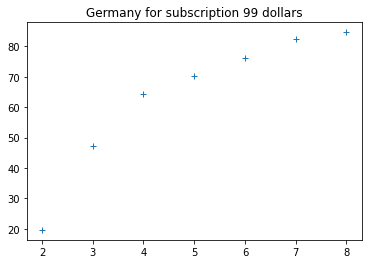

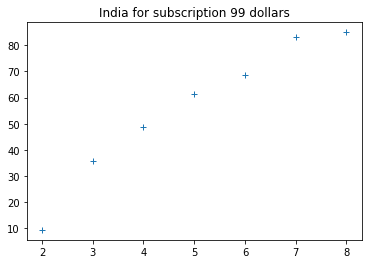

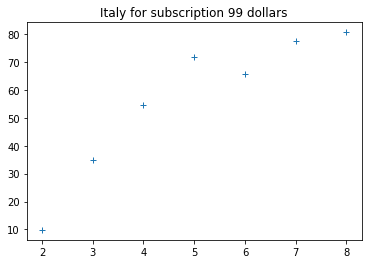

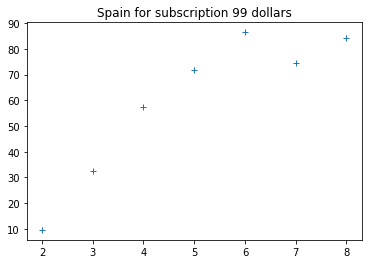

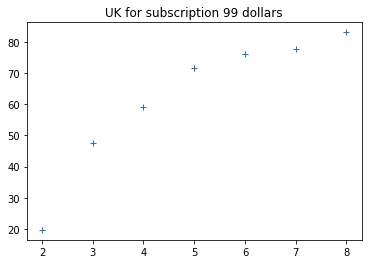

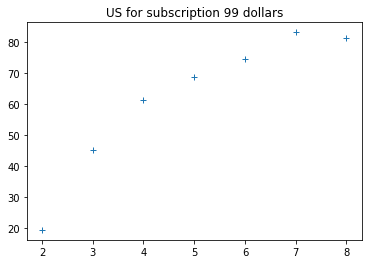

In [90]:
from scipy.optimize import curve_fit
def func29(x, a, b, c):
    return a * np.log(x*b)/(x) + c
for p in prices:
    for co in countries:
        Xx = clients_per_month_with_retention[(clients_per_month_with_retention['Price'] == p)&(clients_per_month_with_retention['Country'] ==co)].dropna()
        X = Xx['Month#'].to_list()
        y = Xx['Retention_per_month'].to_list()
        pt29, pcov29 = curve_fit(func29, X, y, maxfev =1000000000)
        print(pt29)
        print(pcov29)
        plt.figure()
        plt.plot(X, y, '+', label="valeurs expérimentales")
        for x in X:
            print(pt29[0]*np.log(x*pt29[1])/(x)+ pt29[2])
        A = list(map(lambda x: pt29[0]*np.log(x*pt29[1])/(x)+ pt29[2], X))
        plt.plot(X, A, 'r-', label="Modélisation")
        plt.title(co + ' for subscription ' + str(p) + ' dollars')

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/189817605.py:3: RuntimeWarning:

invalid value encountered in log



[130.72366258   0.56860575  74.15353171]
[[ 4.27223556e+02  1.03584428e+00 -1.08145790e+02]
 [ 1.03584428e+00  3.01638569e-03 -2.84246654e-01]
 [-1.08145790e+02 -2.84246654e-01  2.84802843e+01]]
79.75631347005356
91.6065890251672
95.63734839612678
96.91840266668936
97.07109848317381
96.72529531864751
96.15684521925073
[1.20765820e+01 1.15560987e-05 9.86307001e+01]
[[ 5.66678596e+01  6.15910609e-04 -1.43446875e+01]
 [ 6.15910609e-04  6.69743752e-09 -1.56552166e-04]
 [-1.43446875e+01 -1.56552166e-04  3.77768846e+00]]
55.657591737497846
67.62502697314889
74.52100481686651
78.9884225888941
82.10900811687875
84.40692127465317
86.16651922928945
[2.63219627e+01 6.01535146e-03 9.38868994e+01]
[[ 1.80275304e+02  2.10370211e-01 -4.56342247e+01]
 [ 2.10370211e-01  2.46077208e-04 -5.37408971e-02]
 [-4.56342247e+01 -5.37408971e-02  1.20178121e+01]]
55.10330072519262
67.46735975864061
74.26573904378523
78.51486180922353
81.39644735335469
83.46494741475901
85.01347633926872
[129.0485999    0.56634389

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/189817605.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



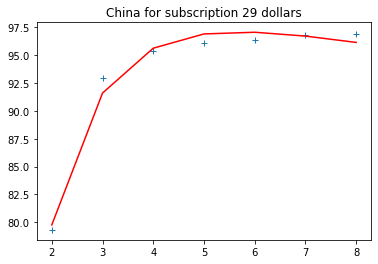

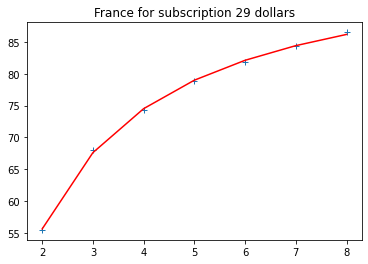

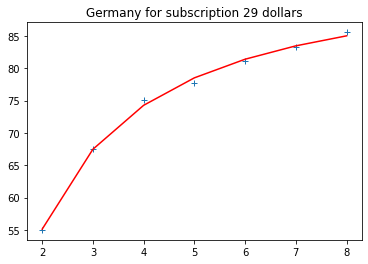

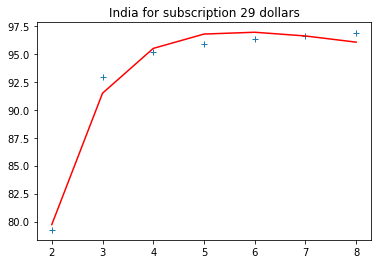

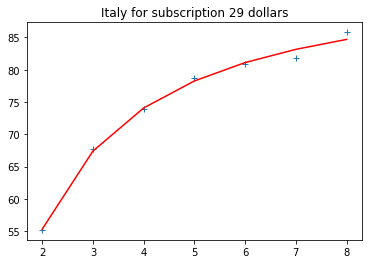

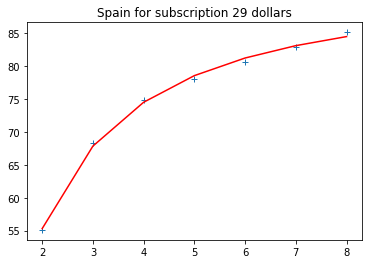

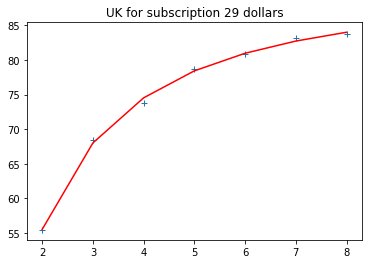

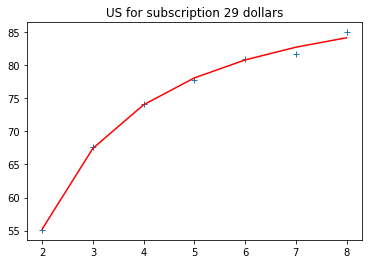

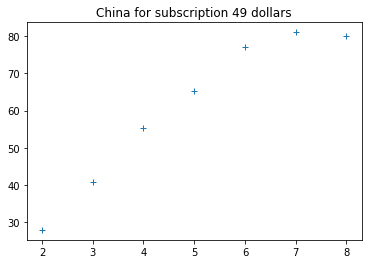

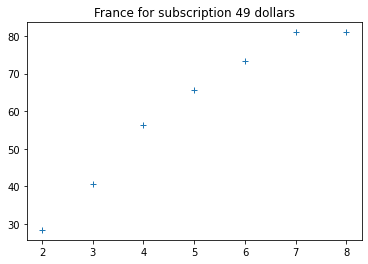

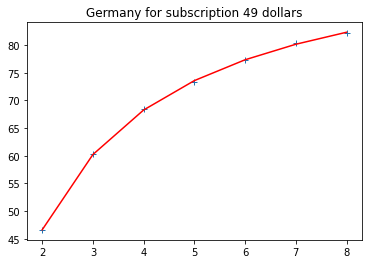

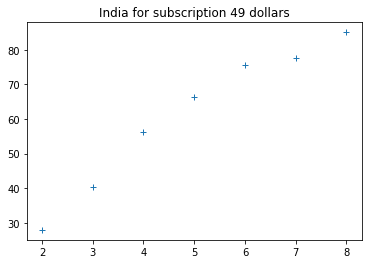

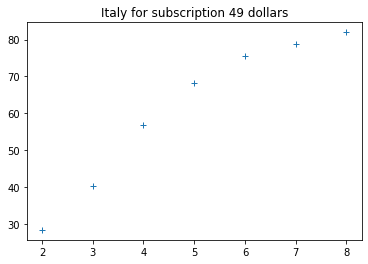

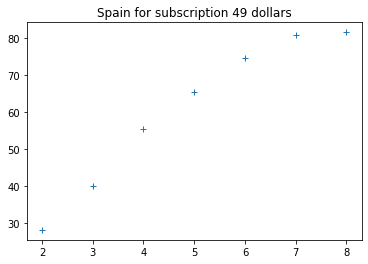

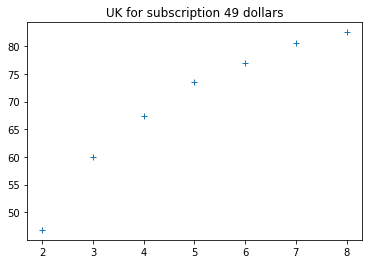

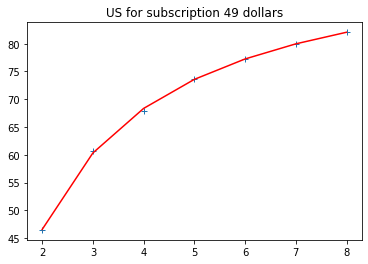

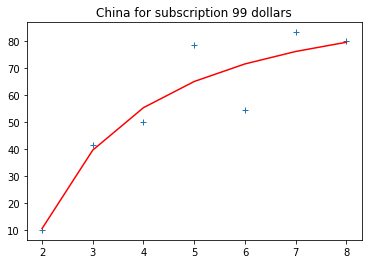

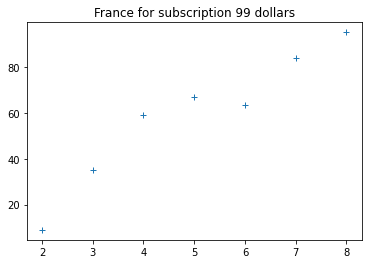

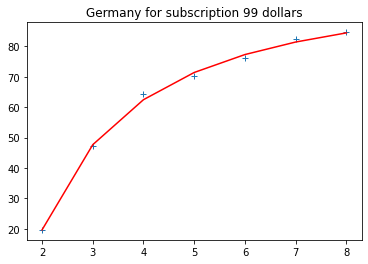

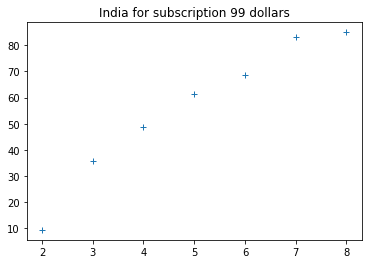

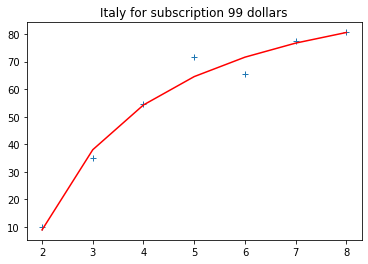

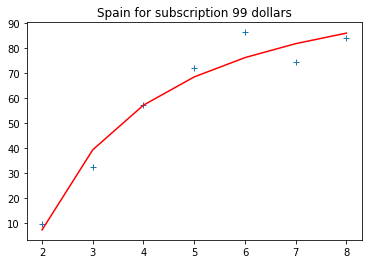

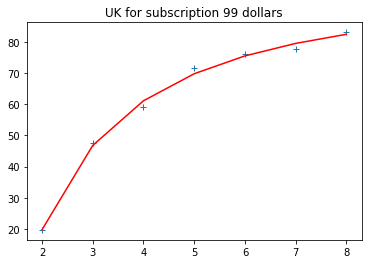

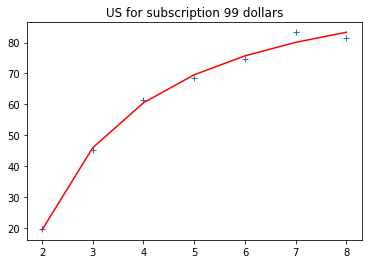

In [91]:
from scipy.optimize import curve_fit
def func29(x, a, b, c):
    return a * np.log(x*b)/(x+1) + c
for p in prices:
    for co in countries:
        Xx = clients_per_month_with_retention[(clients_per_month_with_retention['Price'] == p)&(clients_per_month_with_retention['Country'] ==co)].dropna()
        X = Xx['Month#'].to_list()
        y = Xx['Retention_per_month'].to_list()
        pt29, pcov29 = curve_fit(func29, X, y, maxfev =1000000000)
        print(pt29)
        print(pcov29)
        plt.figure()
        plt.plot(X, y, '+', label="valeurs expérimentales")
        for x in X:
            print(pt29[0]*np.log(x*pt29[1])/(x+1)+ pt29[2])
        A = list(map(lambda x: pt29[0]*np.log(x*pt29[1])/(x+1)+ pt29[2], X))
        plt.plot(X, A, 'r-', label="Modélisation")
        plt.title(co + ' for subscription ' + str(p) + ' dollars')

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/665566084.py:4: RuntimeWarning:

invalid value encountered in log



[175.0194933    0.68012609  66.41320844]
[[ 8.32693272e+02  1.93980050e+00 -2.06575119e+02]
 [ 1.93980050e+00  5.68102402e-03 -5.28036270e-01]
 [-2.06575119e+02 -5.28036270e-01  5.33214212e+01]]
79.87527514189011
91.37572135544386
95.6069642944683
97.01563792692683
97.17906255171033
96.7583425251459
96.06088878404871
[4.93052585e+01 2.05307976e-02 9.50467905e+01]
[[ 1.02013151e+02  1.74154187e-01 -2.53074940e+01]
 [ 1.74154187e-01  2.98946255e-04 -4.38187811e-02]
 [-2.53074940e+01 -4.38187811e-02  6.53240239e+00]]
55.69278745036258
67.56190045033944
74.50675528031007
79.01278180629373
82.14070932673746
84.41921157918858
86.14034945258553
[6.57272034e+01 6.11477557e-02 8.96763813e+01]
[[ 2.96473055e+02  8.29782841e-01 -7.35492447e+01]
 [ 8.29782841e-01  2.34615099e-03 -2.09843028e-01]
 [-7.35492447e+01 -2.09843028e-01  1.89846213e+01]]
55.14799275221477
67.3836879892121
74.25055989084711
78.54947746286653
81.43827619990344
83.47938711098607
84.97675103151931
[172.77495716   0.67714045  

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_95011/665566084.py:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



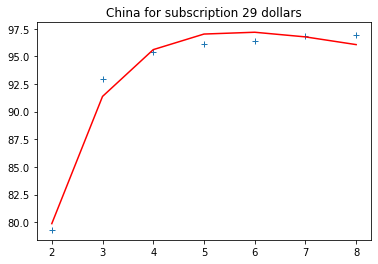

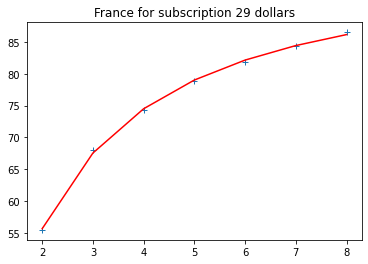

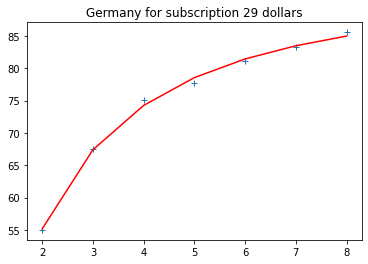

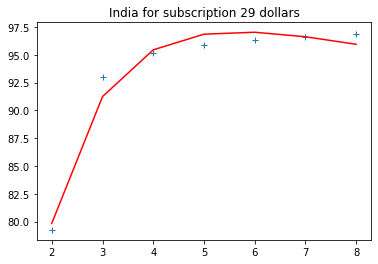

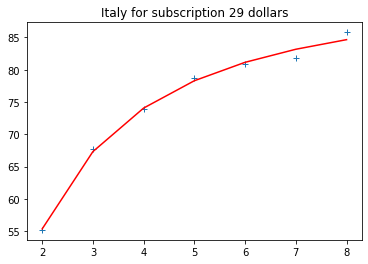

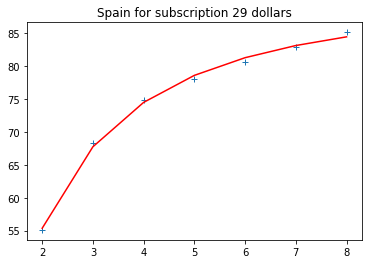

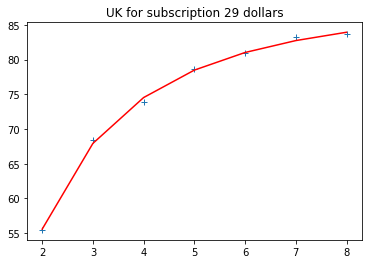

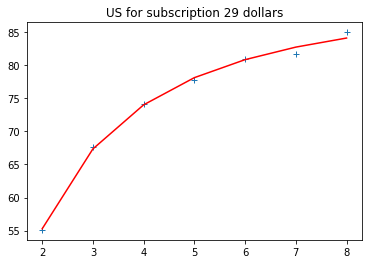

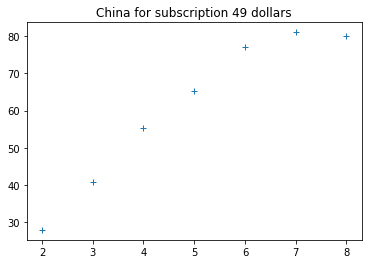

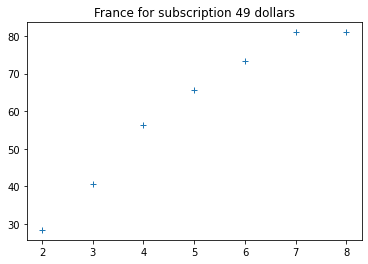

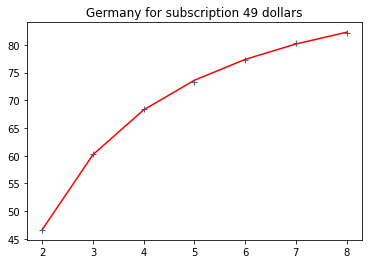

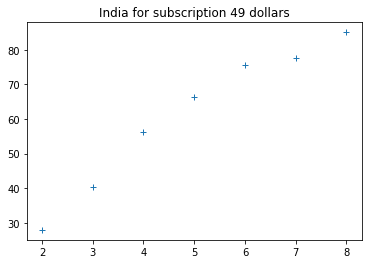

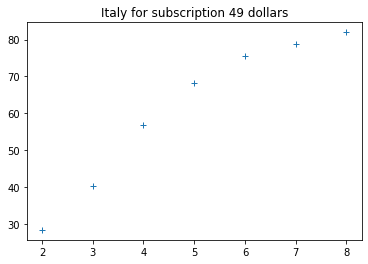

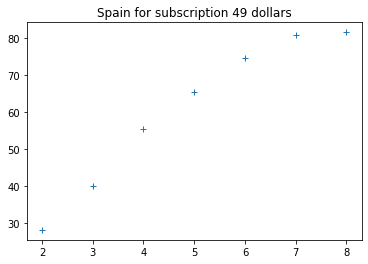

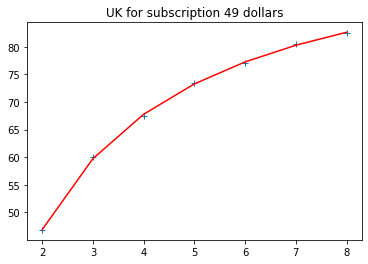

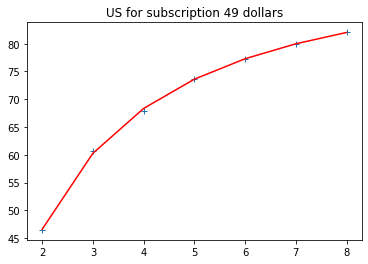

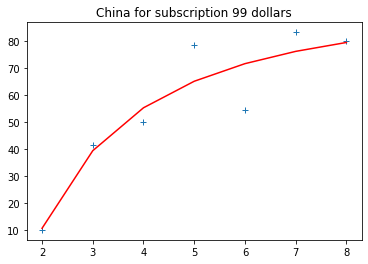

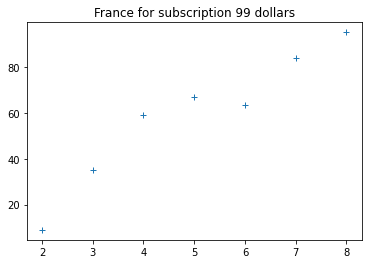

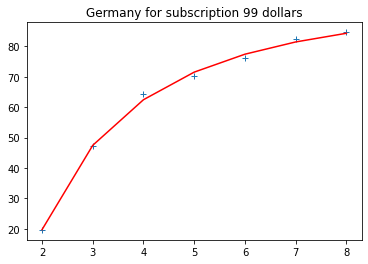

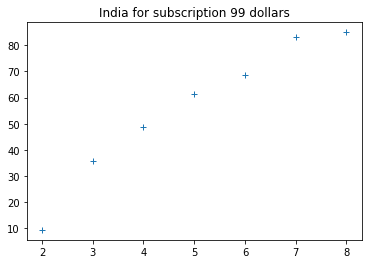

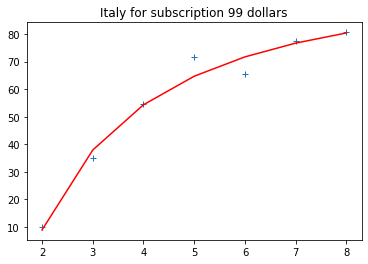

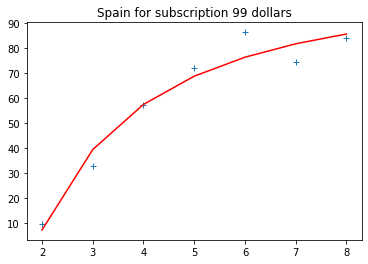

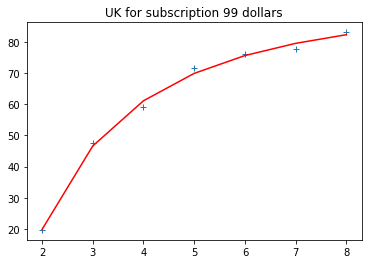

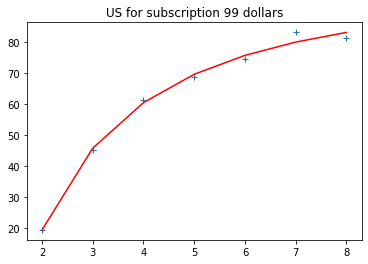

In [92]:
from scipy.optimize import curve_fit
l = 2
def func29(x, a, b, c):
    return a * np.log(x*b)/(x+l) + c
for p in prices:
    for co in countries:
        Xx = clients_per_month_with_retention[(clients_per_month_with_retention['Price'] == p)&(clients_per_month_with_retention['Country'] ==co)].dropna()
        X = Xx['Month#'].to_list()
        y = Xx['Retention_per_month'].to_list()
        pt29, pcov29 = curve_fit(func29, X, y, maxfev =1000000000)
        print(pt29)
        print(pcov29)
        plt.figure()
        plt.plot(X, y, '+', label="valeurs expérimentales")
        for x in X:
            print(pt29[0]*np.log(x*pt29[1])/(x+l)+ pt29[2])
        A = list(map(lambda x: pt29[0]*np.log(x*pt29[1])/(x+l)+ pt29[2], X))
        plt.plot(X, A, 'r-', label="Modélisation")
        plt.title(co + ' for subscription ' + str(p) + ' dollars')

In [137]:
#Visualize retention rate for sources
billing_cycles = np.sort(subscriptions.billing_cycles.unique())
countries = np.sort(subscriptions.country.unique())
prices = np.sort(subscriptions.subscription_monthly_cost.unique())
sources = np.sort(subscriptions.source.unique())
print('All possible months of subscription duration: ',billing_cycles)
print('All possible months of subscription costs: ',prices)
print('All possible months of subscription countries: ',countries)
print('All possible months of subscription sources: ',sources)
clients_per_month_sources = pd.DataFrame(columns = ['Month#', 'Price', 'Source','#Clients'])

for p in prices:
    for i in billing_cycles:  
        for s in sources:
            for co in countries:
                    c = len(subscriptions[(subscriptions['billing_cycles'] >= i)&(subscriptions['subscription_monthly_cost'] == p)&(subscriptions['source']==s)&(subscriptions['country']==co)]['user_id'].unique())
                    df = pd.DataFrame.from_dict({'Month#': [i], 'Price': [p], 'Country': [co], 'Source' : [s], '#Clients': [c]})
                    clients_per_month_sources = pd.concat([clients_per_month_sources, df], ignore_index = True)
print(clients_per_month_sources)
'''for p in prices:
    for s in sources:
        for co in countries:
            plt.title(' Source ' + s + ' at ' + str(p) + ' dollars for ' + co)
            clients_per_month_sources[(clients_per_month_sources['Price'] == p)&(clients_per_month_sources['Source'] == s)&(clients_per_month_sources['Country'] == co)].plot('Months#', '#Clients')
        '''

All possible months of subscription duration:  [1 2 3 4 5 6 7 8]
All possible months of subscription costs:  [29 49 99]
All possible months of subscription countries:  ['China' 'France' 'Germany' 'India' 'Italy' 'Spain' 'UK' 'US']
All possible months of subscription sources:  ['ads' 'friend_referral' 'seo']
    Month# Price Source #Clients  Country
0        1    29    ads    13835    China
1        1    29    ads    11698   France
2        1    29    ads    18008  Germany
3        1    29    ads    14087    India
4        1    29    ads    11038    Italy
..     ...   ...    ...      ...      ...
571      8    99    seo        4    India
572      8    99    seo        9    Italy
573      8    99    seo        4    Spain
574      8    99    seo       71       UK
575      8    99    seo       67       US

[576 rows x 5 columns]


"for p in prices:\n    for s in sources:\n        for co in countries:\n            plt.title(' Source ' + s + ' at ' + str(p) + ' dollars for ' + co)\n            clients_per_month_sources[(clients_per_month_sources['Price'] == p)&(clients_per_month_sources['Source'] == s)&(clients_per_month_sources['Country'] == co)].plot('Months#', '#Clients')\n        "

In [143]:
def fill_retention_c_s(arr):
    arr = arr.assign(Retention_overall = 0)
    arr = arr.assign(Retention_per_month = 0)
    clients_per_month_with_ = pd.DataFrame(columns = ['Month#', 'Price', 'Country', 'Source', '#Clients', '1/#Clients', 'Retention_overall', 'Retention_per_month'])
    for p in prices:
        for co in countries:
            for s in sources:
                a = arr[(arr['Price'] == p)&(arr['Country'] == co)&(arr['Source'] == s)]['#Clients'].iat[0]
                df = arr[(arr['Price'] == p)&(arr['Country'] == co)&(arr['Source'] == s)][1:len(arr)+1]
                df1 = df['#Clients'].shift(1).dropna()*100
                df1 = df1.reset_index().drop('index', axis = 1)
                df['Retention_overall'] = df['#Clients']/a*100
                df1 = df1[df1['#Clients'] == 0].replace([0],100000)
                df['Retention_per_month'] = df['#Clients']/df1['#Clients']*100    
                clients_per_month_with_ = pd.concat([clients_per_month_with_, df])
    return clients_per_month_with_

In [144]:
clients_per_month_sources = fill_retention_c_s(clients_per_month_sources)

In [145]:
clients_per_month_sources

Month# Price Country Source #Clients 1/#Clients Retention_overall  \
48       3    29   China    ads    10019        NaN         92.306984   
72       4    29   China    ads     9492        NaN         87.451631   
96       5    29   China    ads     9081        NaN         83.665008   
120      6    29   China    ads     8715        NaN          80.29298   
144      7    29   China    ads     8396        NaN         77.353971   
..     ...   ...     ...    ...      ...        ...               ...   
479      4    99      US    seo      168        NaN         41.277641   
503      5    99      US    seo      123        NaN          30.22113   
527      6    99      US    seo       89        NaN         21.867322   
551      7    99      US    seo       83        NaN          20.39312   
575      8    99      US    seo       67        NaN         16.461916   

    Retention_per_month Source#Clients  
48                  NaN            NaN  
72                  NaN            NaN  
96                  NaN            NaN  
120                 NaN            NaN  
144                 NaN            NaN  
..                  ...            ...  
479                 NaN            NaN  
503                 NaN            NaN  
527                 NaN            NaN  
551                 NaN            NaN  
575                 NaN            NaN  

[432 rows x 9 columns]

In [147]:
def plot_retention_price_source(retention_or_clients, price, country, title, n, df, s):
    legend = []
    color = draw_colors(n)
    j = 0
    m = 0
    for p in price:
        fig, ax = plt.subplots()
        for co in country:
            x = df[(df['Price'] == p)&(df['Country'] == co)]['Month#'].reset_index().drop('index', axis = 1)
            y = df[(df['Price'] == p)&(df['Country'] == co)][retention_or_clients].reset_index().drop('index', axis = 1)
            legend += [co + ' ' + str(p)]
            ax.plot(x,y, label= [co + ' ' + str(p)], color = color[j])  
            leg = ax.legend(legend[m:j+1], bbox_to_anchor=(1, 0.5))
            j += 1
        for t in range(m,j-1):
            leg.get_lines()[t-m].set_color(color[t])
        m = j
        plt.title('Global for ' + str(p) + ' dollars - ' + title + ' - ' + s)
        plt.savefig(path + 'Global for ' + str(p) + ' dollars - ' + title  + ' - ' + str(s) +'.png')
        plt.show()
        
def plot_retention_country_source(retention_or_clients, price, country, title, n, df, s):
    legend = []
    color = draw_colors(n)
    j = 0
    m = 0
    for co in country:
        fig, ax = plt.subplots()
        for p in price:
            x = df[(df['Price'] == p)&(df['Country'] == co)]['Month#'].reset_index().drop('index', axis = 1)
            y = df[(df['Price'] == p)&(df['Country'] == co)][retention_or_clients].reset_index().drop('index', axis = 1)
            legend += [co + ' ' + str(p)]
            ax.plot(x,y, label= [co + ' ' + str(p)], color = color[j])
            leg = ax.legend(legend[m:j+1], bbox_to_anchor=(1, 0.5))
            j += 1
        for t in range(m,j-1):
            leg.get_lines()[t-m].set_color(color[t])
        m = j
        plt.title(co + ' - ' + title+ ' - ' + s)
        plt.savefig(path + co + ' - ' + title +  ' - ' + str(s) +'.png')
        plt.show()

ads


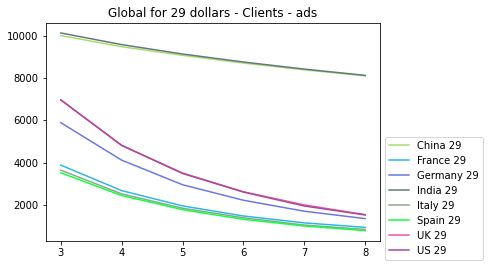

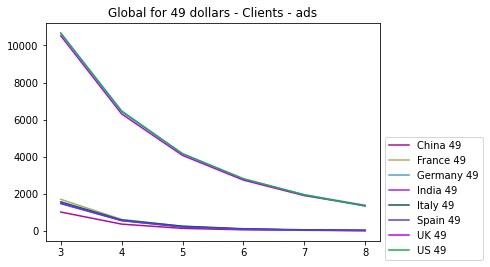

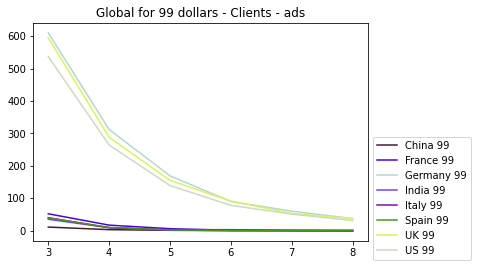

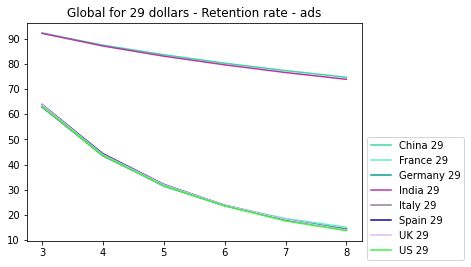

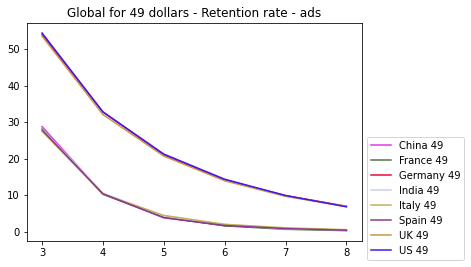

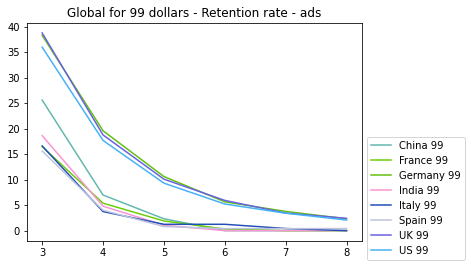

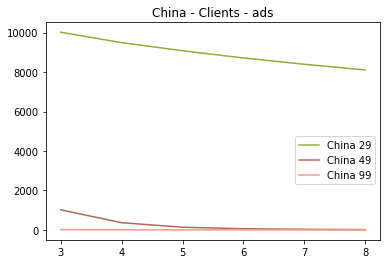

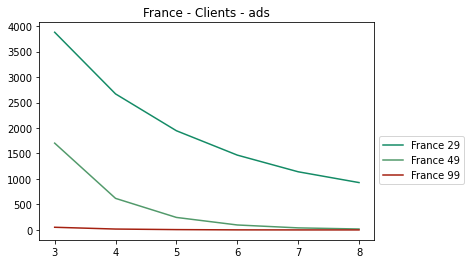

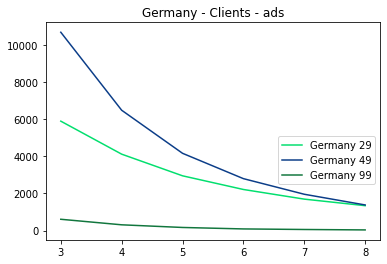

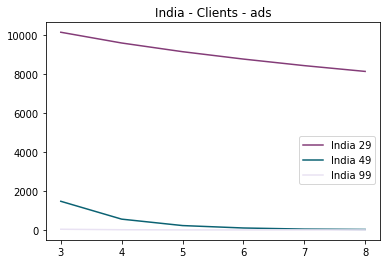

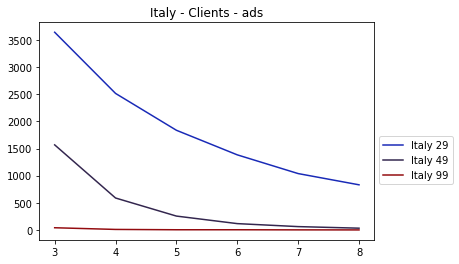

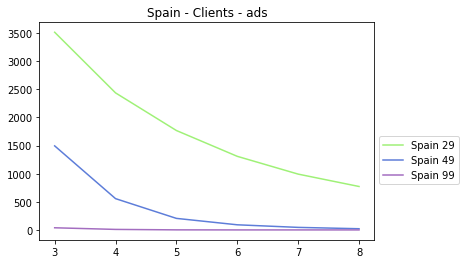

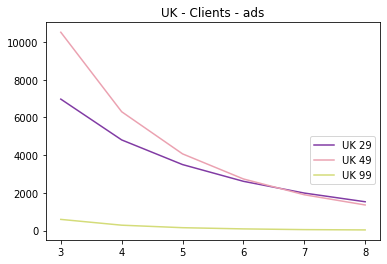

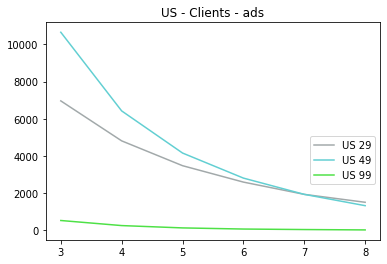

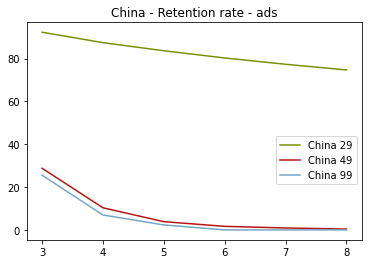

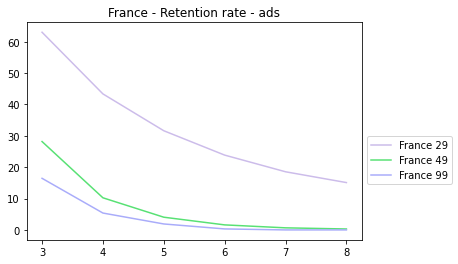

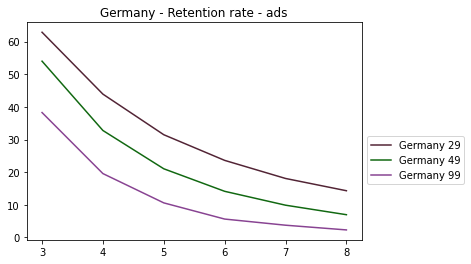

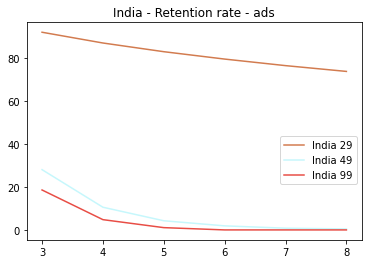

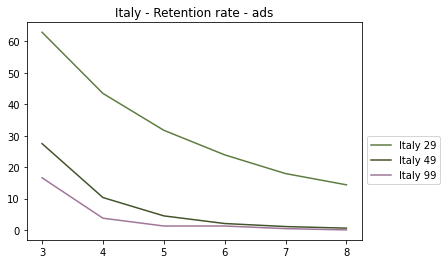

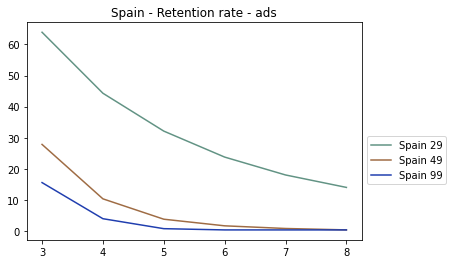

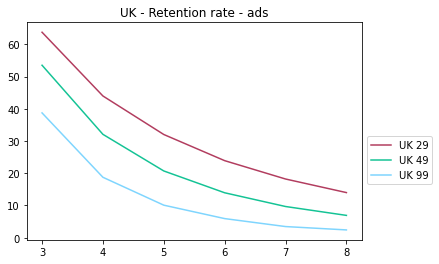

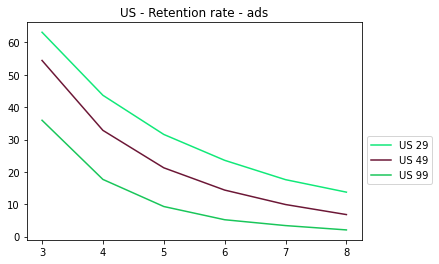

friend_referral


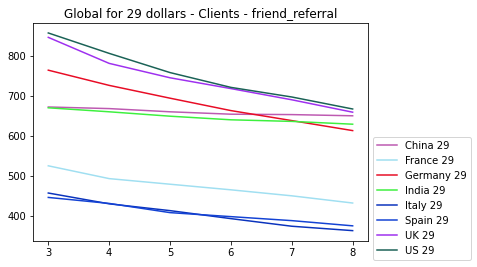

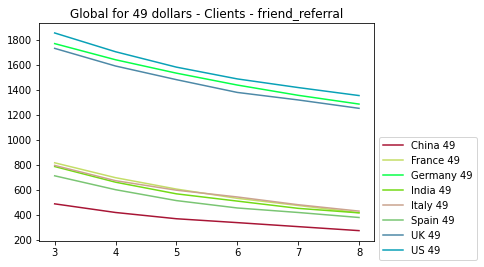

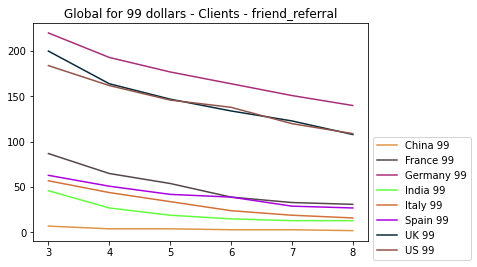

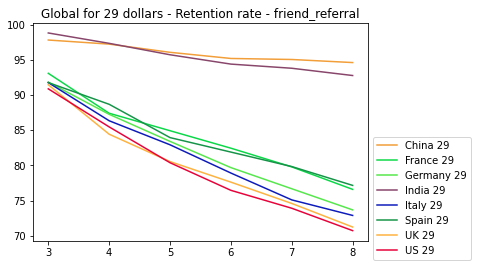

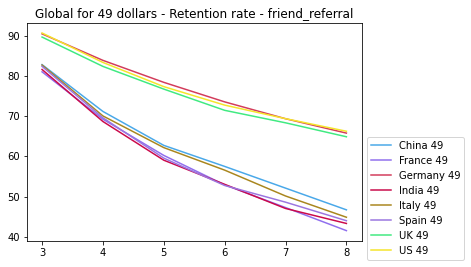

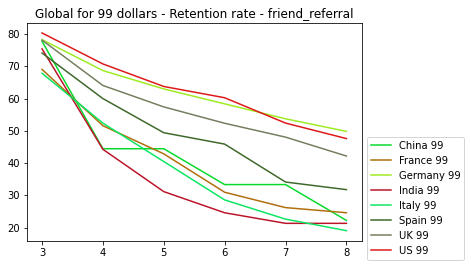

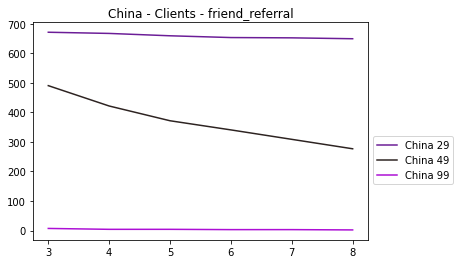

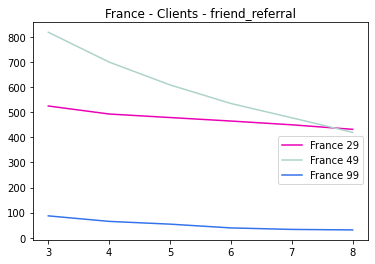

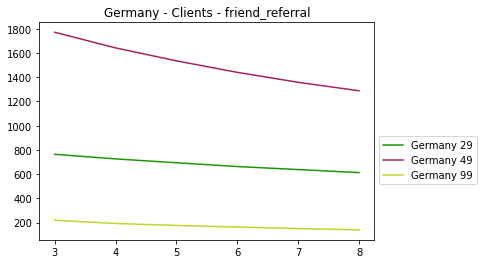

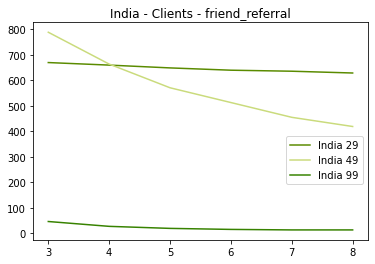

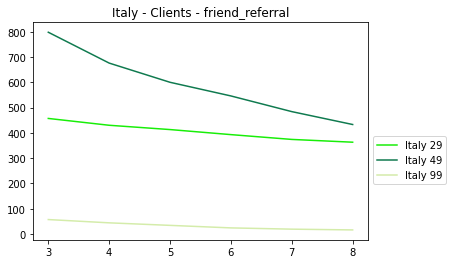

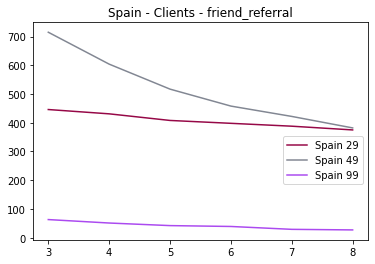

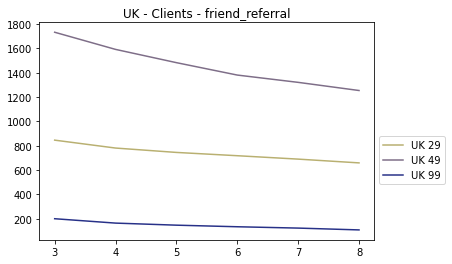

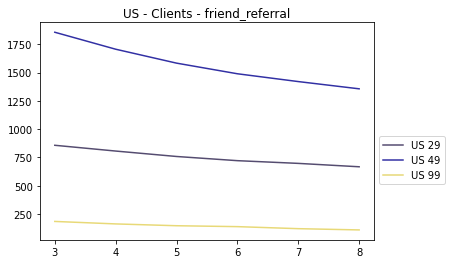

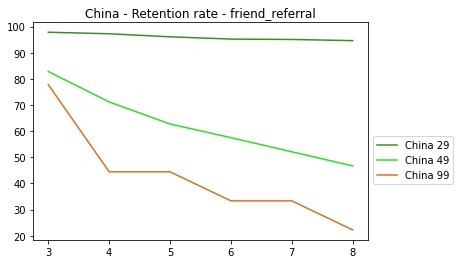

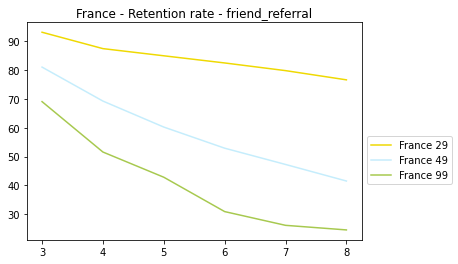

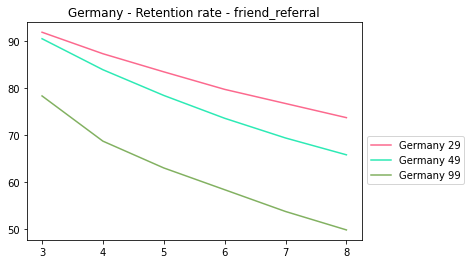

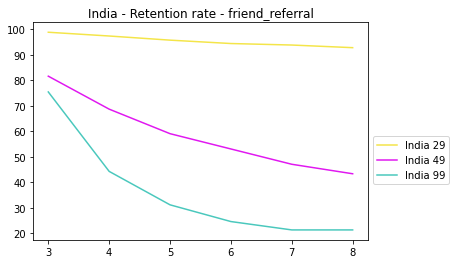

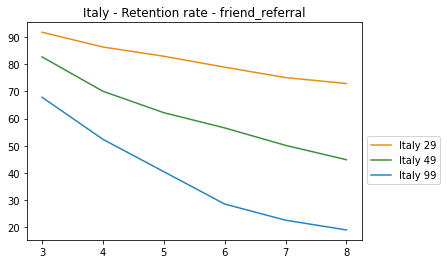

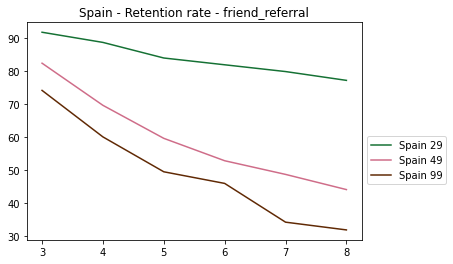

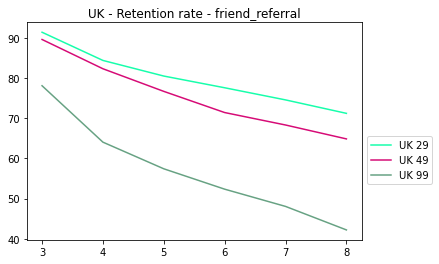

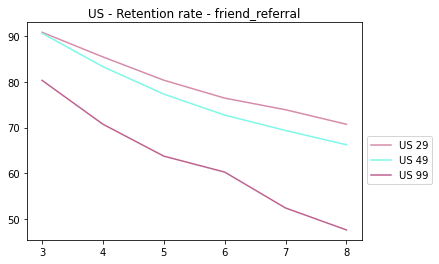

seo


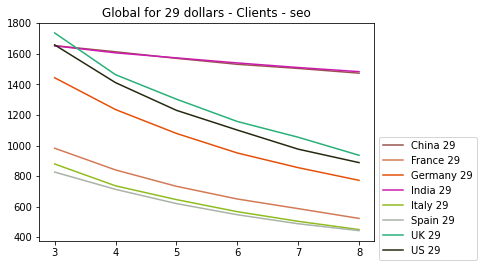

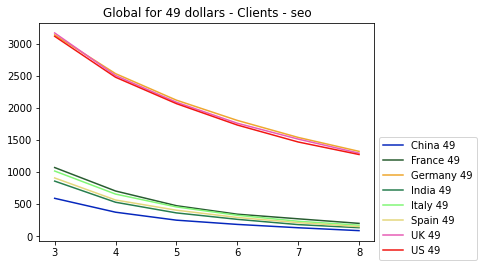

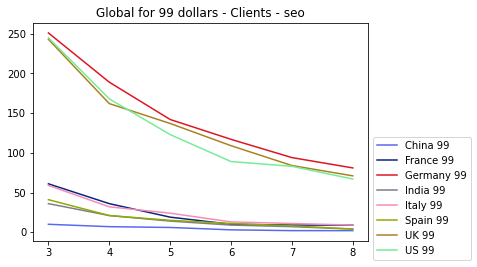

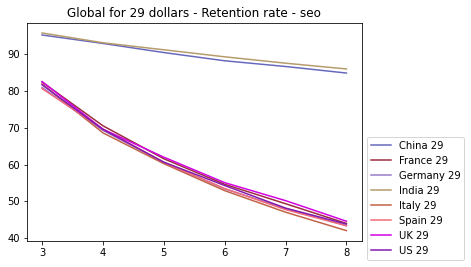

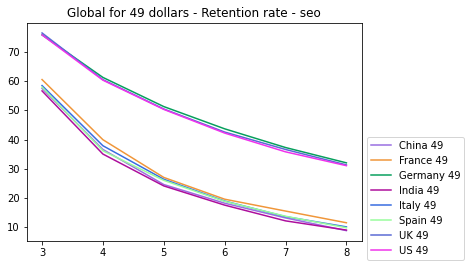

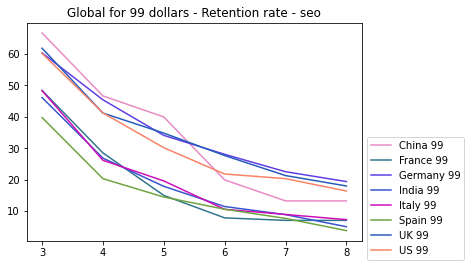

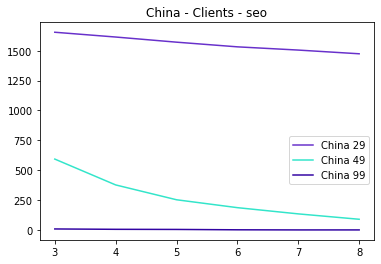

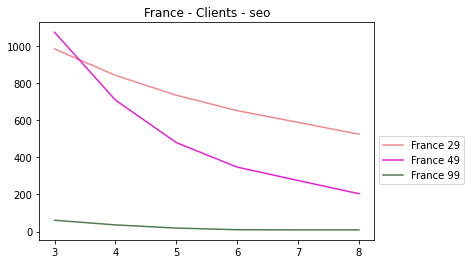

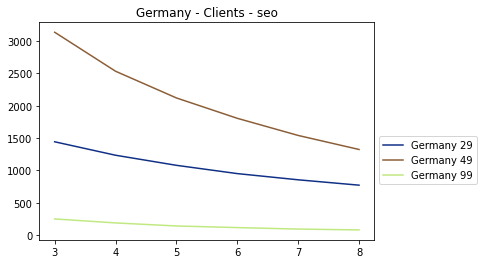

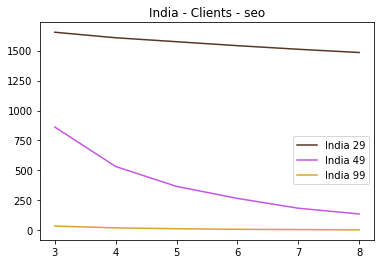

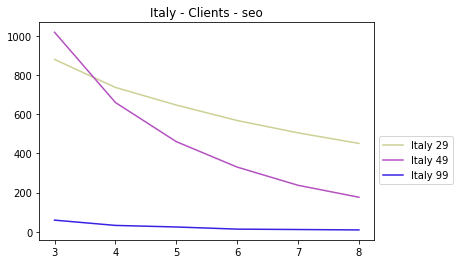

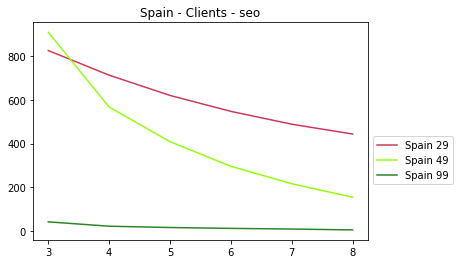

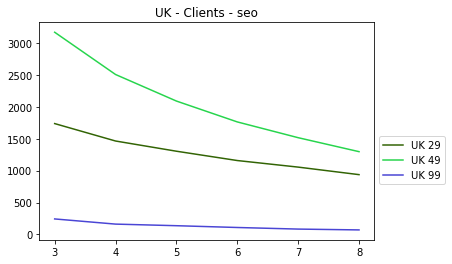

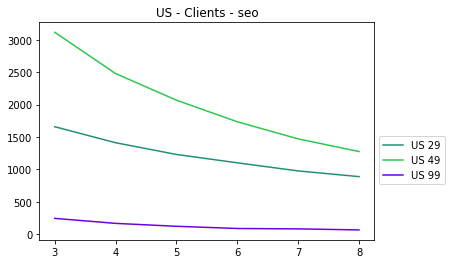

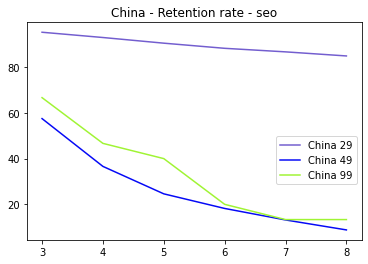

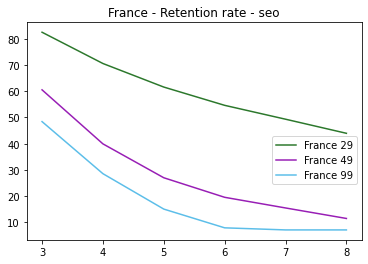

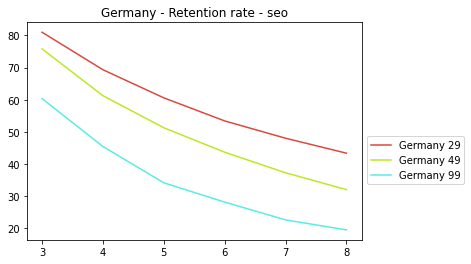

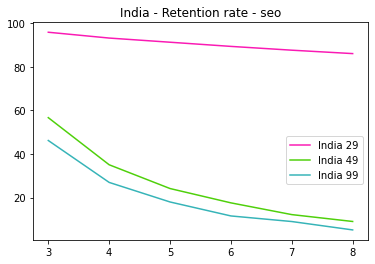

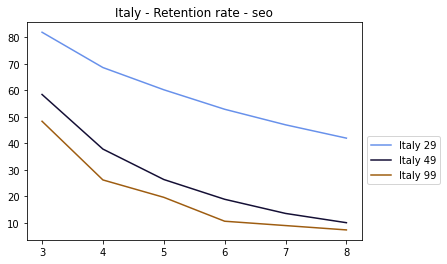

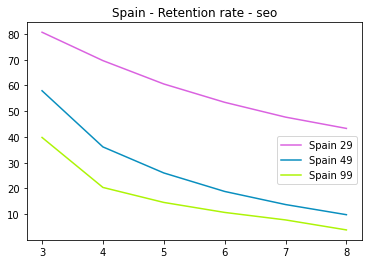

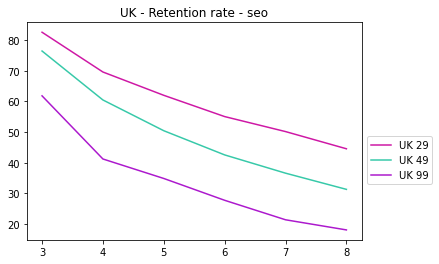

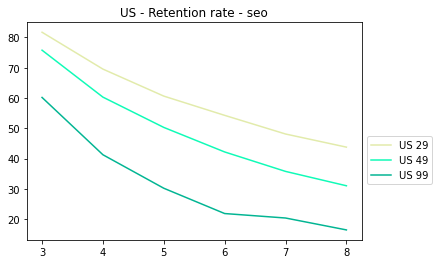

In [148]:
n_plots = len(countries)*len(prices)
for s in sources:
    print(s)
    df = clients_per_month_sources[clients_per_month_sources['Source'] == s]
    plot_retention_price_source('#Clients', prices, countries, 'Clients', n_plots, df,s)    
    plot_retention_price_source('Retention_overall', prices, countries, 'Retention rate', n_plots, df,s)
    plot_retention_country_source('#Clients', prices, countries, 'Clients', n_plots, df,s)    
    plot_retention_country_source('Retention_overall', prices, countries, 'Retention rate', n_plots, df,s)

                       #Clients
Source          Price          
ads             29       107411
                49       233822
                99        43491
friend_referral 29         7097
                49        14589
                99         2742
seo             29        18019
                49        36631
                99         6453
       #Clients
Price          
29       107411
49       233822
99        43491
       #Clients
Price          
29         7097
49        14589
99         2742
       #Clients
Price          
29        18019
49        36631
99         6453
                 #Clients
Source                   
ads                107411
friend_referral      7097
seo                 18019
                 #Clients
Source                   
ads                233822
friend_referral     14589
seo                 36631
                 #Clients
Source                   
ads                 43491
friend_referral      2742
seo                  6453


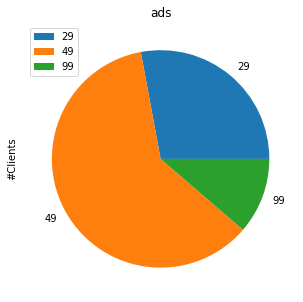

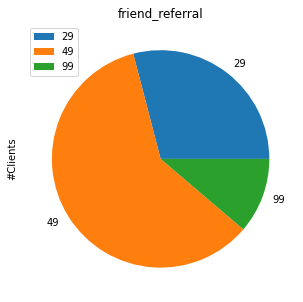

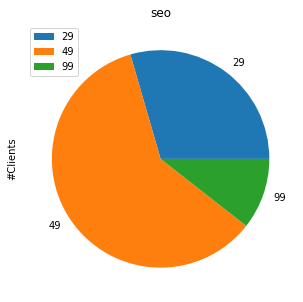

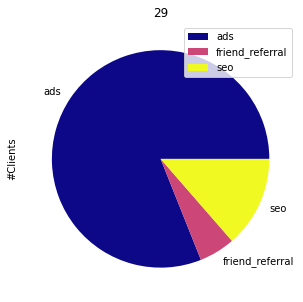

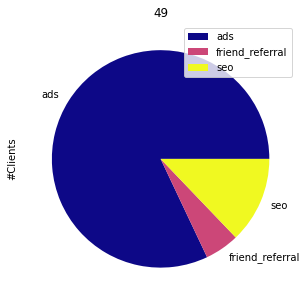

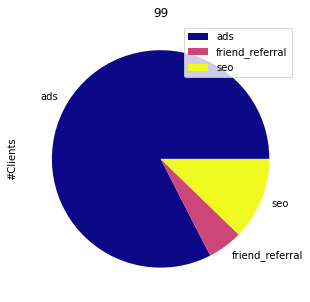

In [112]:
#Market analysis
df1 = clients_per_month_sources[['Price', 'Source', '#Clients']][clients_per_month_sources['Month#'] == 1]
df1 = df1.groupby(['Source','Price']).sum()
print(df1)
for s in sources:
    df = df1.loc[s]
    print(df)
    plot = df.plot.pie(y='#Clients', figsize=(5, 5), title = s)
    plt.savefig(path + 'Repartition for source ' + s)

df1 = clients_per_month_sources[['Price', 'Source', '#Clients']][clients_per_month_sources['Month#'] == 1]
df1 = df1.groupby(['Price', 'Source']).sum()
for p in prices:
    df = df1.loc[p]
    print(df)
    plot = df.plot.pie(y='#Clients', figsize=(5, 5), title = p, cmap = 'plasma')
    plt.savefig(path + 'Repartition for price ' + str(p))
